In [1]:
%matplotlib inline
import os
import sys
N_up = 2
nb_dir = '/'.join(os.getcwd().split('/')[:-N_up])
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
from __future__ import division
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *


In [8]:
names = ['wine', 'default_credit', 'compas', 'lsat']
widths = [200, 200, 200, 200]
depths = [2, 2, 2, 2]




## The splits that we use here are not super important

In [9]:
from src.UCI_loader import load_UCI
from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec
from src.LSAT_loader import get_my_LSAT

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
    load_UCI(dset_name='wine', splits=10, seed=42, separate_targets=True, save_dir='../data/')
print('Wine', x_train.shape, x_test.shape)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
    load_UCI(dset_name='default_credit', splits=10, seed=42, separate_targets=True, save_dir='../data/')
print('Credit', x_train.shape, x_test.shape)

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
print('Compas', x_train.shape, x_test.shape)

# Lsat has a fixes train test split which we take from other paper
x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')
print('LSAT', x_train.shape, x_test.shape)


('Wine', (1438, 11), (160, 11))
('Credit', (27000, 23), (3000, 23))






('Compas', (5554, 17), (618, 17))


('LSAT', (17432, 12), (4358, 12))


## Wine (Regression)

((1438, 11), (1438, 1))

Net:
 Creating Net!! 
BNN gaussian output
    Total params: 0.04M

Network:

Train:
  init cost variables:
it 0/2200, Jtr_pred = 1.726888,    time: 0.163354 seconds

    Jdev = 1.498097 

 Loglike = -1.2902, rms = 0.7625

best test error
it 1/2200, Jtr_pred = 1.623737,    time: 0.144071 seconds

it 2/2200, Jtr_pred = 1.474579,    time: 0.136048 seconds

it 3/2200, Jtr_pred = 1.364333,    time: 0.136541 seconds

it 4/2200, Jtr_pred = 1.357152,    time: 0.137612 seconds

it 5/2200, Jtr_pred = 1.348430,    time: 0.133680 seconds

it 6/2200, Jtr_pred = 1.325454,    time: 0.137513 seconds

it 7/2200, Jtr_pred = 1.321119,    time: 0.137746 seconds

it 8/2200, Jtr_pred = 1.331274,    time: 0.136950 seconds

it 9/2200, Jtr_pred = 1.328901,    time: 0.135400 seconds

it 10/2200, Jtr_pred = 1.318942,    time: 0.139127 seconds

    Jdev = 1.254072 

 Loglike = -1.0462, rms = 0.6824

best test error
it 11/2200, Jtr_pred = 1.317302,    time: 0.134650 seconds

it 12/2200, Jt

it 103/2200, Jtr_pred = 1.109488,    time: 0.138314 seconds

it 104/2200, Jtr_pred = 1.096492,    time: 0.138206 seconds

it 105/2200, Jtr_pred = 1.088209,    time: 0.138073 seconds

it 106/2200, Jtr_pred = 1.077098,    time: 0.140371 seconds

it 107/2200, Jtr_pred = 1.069225,    time: 0.138875 seconds

it 108/2200, Jtr_pred = 1.056070,    time: 0.137545 seconds

it 109/2200, Jtr_pred = 1.065458,    time: 0.134833 seconds

it 110/2200, Jtr_pred = 1.055424,    time: 0.139570 seconds

    Jdev = 1.599346 

 Loglike = -1.3914, rms = 0.6986

it 111/2200, Jtr_pred = 1.078101,    time: 0.136411 seconds

it 112/2200, Jtr_pred = 1.064191,    time: 0.142104 seconds

it 113/2200, Jtr_pred = 1.076691,    time: 0.139083 seconds

it 114/2200, Jtr_pred = 1.061825,    time: 0.138900 seconds

it 115/2200, Jtr_pred = 1.056513,    time: 0.136607 seconds

it 116/2200, Jtr_pred = 1.056266,    time: 0.142454 seconds

it 117/2200, Jtr_pred = 1.045555,    time: 0.136442 seconds

it 118/2200, Jtr_pred = 1.045

it 207/2200, Jtr_pred = 1.035398,    time: 0.135861 seconds

it 208/2200, Jtr_pred = 1.068108,    time: 0.142724 seconds

it 209/2200, Jtr_pred = 1.079125,    time: 0.135101 seconds

it 210/2200, Jtr_pred = 1.062509,    time: 0.140431 seconds

    Jdev = 1.426900 

 Loglike = -1.2190, rms = 0.6905

it 211/2200, Jtr_pred = 1.048789,    time: 0.142671 seconds

it 212/2200, Jtr_pred = 1.022487,    time: 0.136212 seconds

it 213/2200, Jtr_pred = 0.988704,    time: 0.134158 seconds

it 214/2200, Jtr_pred = 0.982956,    time: 0.136836 seconds

it 215/2200, Jtr_pred = 0.977226,    time: 0.132336 seconds

it 216/2200, Jtr_pred = 0.969434,    time: 0.133436 seconds

it 217/2200, Jtr_pred = 0.973727,    time: 0.131679 seconds

it 218/2200, Jtr_pred = 0.967480,    time: 0.132044 seconds

it 219/2200, Jtr_pred = 0.984079,    time: 0.132491 seconds

it 220/2200, Jtr_pred = 1.000351,    time: 0.133510 seconds

 saving weight samples 6/100
    Jdev = 1.518675 

 Loglike = -1.3108, rms = 0.6758

it 22

    Jdev = 1.724376 

 Loglike = -1.5165, rms = 0.6555

it 311/2200, Jtr_pred = 0.971560,    time: 0.132742 seconds

it 312/2200, Jtr_pred = 0.962633,    time: 0.139573 seconds

it 313/2200, Jtr_pred = 1.172822,    time: 0.132044 seconds

it 314/2200, Jtr_pred = 1.150099,    time: 0.132406 seconds

it 315/2200, Jtr_pred = 1.146501,    time: 0.133011 seconds

it 316/2200, Jtr_pred = 1.103898,    time: 0.133670 seconds

it 317/2200, Jtr_pred = 1.014744,    time: 0.132659 seconds

it 318/2200, Jtr_pred = 0.976174,    time: 0.131555 seconds

it 319/2200, Jtr_pred = 0.987524,    time: 0.134382 seconds

it 320/2200, Jtr_pred = 0.966561,    time: 0.132977 seconds

 saving weight samples 11/100
    Jdev = 1.325607 

 Loglike = -1.1177, rms = 0.6525

it 321/2200, Jtr_pred = 0.957652,    time: 0.133287 seconds

it 322/2200, Jtr_pred = 0.965917,    time: 0.134567 seconds

it 323/2200, Jtr_pred = 0.960122,    time: 0.135136 seconds

it 324/2200, Jtr_pred = 0.953757,    time: 0.132089 seconds

it 3

it 414/2200, Jtr_pred = 0.996104,    time: 0.131902 seconds

it 415/2200, Jtr_pred = 0.990429,    time: 0.134501 seconds

it 416/2200, Jtr_pred = 0.973065,    time: 0.132932 seconds

it 417/2200, Jtr_pred = 0.961948,    time: 0.132299 seconds

it 418/2200, Jtr_pred = 0.972000,    time: 0.132758 seconds

it 419/2200, Jtr_pred = 1.006335,    time: 0.131066 seconds

it 420/2200, Jtr_pred = 1.044018,    time: 0.132876 seconds

 saving weight samples 16/100
    Jdev = 1.734151 

 Loglike = -1.5262, rms = 0.6890

it 421/2200, Jtr_pred = 0.994892,    time: 0.133114 seconds

it 422/2200, Jtr_pred = 0.990443,    time: 0.132538 seconds

it 423/2200, Jtr_pred = 0.958714,    time: 0.132567 seconds

it 424/2200, Jtr_pred = 0.957845,    time: 0.131607 seconds

it 425/2200, Jtr_pred = 0.946498,    time: 0.132705 seconds

it 426/2200, Jtr_pred = 0.936629,    time: 0.135650 seconds

it 427/2200, Jtr_pred = 0.923437,    time: 0.132098 seconds

it 428/2200, Jtr_pred = 0.926662,    time: 0.150901 seconds


it 518/2200, Jtr_pred = 1.193280,    time: 0.136179 seconds

it 519/2200, Jtr_pred = 1.347751,    time: 0.135951 seconds

it 520/2200, Jtr_pred = 1.481228,    time: 0.133285 seconds

 saving weight samples 21/100
    Jdev = 1.671835 

 Loglike = -1.4639, rms = 0.8232

it 521/2200, Jtr_pred = 1.546833,    time: 0.135672 seconds

it 522/2200, Jtr_pred = 1.412858,    time: 0.132374 seconds

it 523/2200, Jtr_pred = 1.279419,    time: 0.135645 seconds

it 524/2200, Jtr_pred = 1.220910,    time: 0.134902 seconds

it 525/2200, Jtr_pred = 1.202856,    time: 0.133511 seconds

it 526/2200, Jtr_pred = 1.168543,    time: 0.139143 seconds

it 527/2200, Jtr_pred = 1.116422,    time: 0.135289 seconds

it 528/2200, Jtr_pred = 1.107186,    time: 0.131605 seconds

it 529/2200, Jtr_pred = 1.105740,    time: 0.130981 seconds

it 530/2200, Jtr_pred = 1.074785,    time: 0.133527 seconds

    Jdev = 1.367397 

 Loglike = -1.1595, rms = 0.6912

it 531/2200, Jtr_pred = 1.066993,    time: 0.135938 seconds

it 5

 Loglike = -1.1404, rms = 0.6691

it 621/2200, Jtr_pred = 1.053284,    time: 0.132459 seconds

it 622/2200, Jtr_pred = 1.061253,    time: 0.134039 seconds

it 623/2200, Jtr_pred = 1.006698,    time: 0.134050 seconds

it 624/2200, Jtr_pred = 0.982409,    time: 0.133496 seconds

it 625/2200, Jtr_pred = 0.988948,    time: 0.132742 seconds

it 626/2200, Jtr_pred = 1.013591,    time: 0.134001 seconds

it 627/2200, Jtr_pred = 0.969040,    time: 0.135730 seconds

it 628/2200, Jtr_pred = 0.966472,    time: 0.134774 seconds

it 629/2200, Jtr_pred = 0.970331,    time: 0.136868 seconds

it 630/2200, Jtr_pred = 0.968697,    time: 0.133661 seconds

    Jdev = 1.662451 

 Loglike = -1.4545, rms = 0.6412

it 631/2200, Jtr_pred = 0.972080,    time: 0.135672 seconds

it 632/2200, Jtr_pred = 0.982605,    time: 0.133129 seconds

it 633/2200, Jtr_pred = 0.977215,    time: 0.133996 seconds

it 634/2200, Jtr_pred = 0.960368,    time: 0.131134 seconds

it 635/2200, Jtr_pred = 0.979117,    time: 0.132512 seco

it 725/2200, Jtr_pred = 0.972484,    time: 0.134380 seconds

it 726/2200, Jtr_pred = 0.984471,    time: 0.132384 seconds

it 727/2200, Jtr_pred = 0.976883,    time: 0.134061 seconds

it 728/2200, Jtr_pred = 0.970739,    time: 0.134690 seconds

it 729/2200, Jtr_pred = 0.968463,    time: 0.132576 seconds

it 730/2200, Jtr_pred = 0.955847,    time: 0.131383 seconds

    Jdev = 1.342752 

 Loglike = -1.1348, rms = 0.6278

it 731/2200, Jtr_pred = 0.951438,    time: 0.132652 seconds

it 732/2200, Jtr_pred = 0.958898,    time: 0.132532 seconds

it 733/2200, Jtr_pred = 0.974843,    time: 0.134590 seconds

it 734/2200, Jtr_pred = 0.966492,    time: 0.136075 seconds

it 735/2200, Jtr_pred = 0.947778,    time: 0.133229 seconds

it 736/2200, Jtr_pred = 0.959635,    time: 0.131756 seconds

it 737/2200, Jtr_pred = 0.942771,    time: 0.134772 seconds

it 738/2200, Jtr_pred = 0.947279,    time: 0.134723 seconds

it 739/2200, Jtr_pred = 0.953760,    time: 0.132664 seconds

it 740/2200, Jtr_pred = 0.950

it 829/2200, Jtr_pred = 1.037728,    time: 0.132142 seconds

it 830/2200, Jtr_pred = 1.028539,    time: 0.131780 seconds

    Jdev = 1.595959 

 Loglike = -1.3880, rms = 0.6402

it 831/2200, Jtr_pred = 0.989362,    time: 0.134953 seconds

it 832/2200, Jtr_pred = 1.019267,    time: 0.136155 seconds

it 833/2200, Jtr_pred = 1.007616,    time: 0.133356 seconds

it 834/2200, Jtr_pred = 0.972198,    time: 0.131214 seconds

it 835/2200, Jtr_pred = 1.011981,    time: 0.133523 seconds

it 836/2200, Jtr_pred = 1.016758,    time: 0.131543 seconds

it 837/2200, Jtr_pred = 0.992742,    time: 0.132914 seconds

it 838/2200, Jtr_pred = 0.963677,    time: 0.135827 seconds

it 839/2200, Jtr_pred = 0.972056,    time: 0.133698 seconds

it 840/2200, Jtr_pred = 0.990092,    time: 0.133748 seconds

 saving weight samples 37/100
    Jdev = 1.311064 

 Loglike = -1.1032, rms = 0.6449

it 841/2200, Jtr_pred = 0.990823,    time: 0.135544 seconds

it 842/2200, Jtr_pred = 1.022096,    time: 0.132592 seconds

it 8

it 931/2200, Jtr_pred = 1.776483,    time: 0.132400 seconds

it 932/2200, Jtr_pred = 1.646762,    time: 0.133485 seconds

it 933/2200, Jtr_pred = 1.532986,    time: 0.134490 seconds

it 934/2200, Jtr_pred = 1.492809,    time: 0.134546 seconds

it 935/2200, Jtr_pred = 1.460591,    time: 0.134651 seconds

it 936/2200, Jtr_pred = 1.356232,    time: 0.131238 seconds

it 937/2200, Jtr_pred = 1.315931,    time: 0.133627 seconds

it 938/2200, Jtr_pred = 1.312648,    time: 0.135164 seconds

it 939/2200, Jtr_pred = 1.302267,    time: 0.131080 seconds

it 940/2200, Jtr_pred = 1.408249,    time: 0.136966 seconds

 saving weight samples 42/100
    Jdev = 1.570448 

 Loglike = -1.3625, rms = 0.7148

it 941/2200, Jtr_pred = 1.472255,    time: 0.130380 seconds

it 942/2200, Jtr_pred = 1.344986,    time: 0.136391 seconds

it 943/2200, Jtr_pred = 1.356675,    time: 0.132373 seconds

it 944/2200, Jtr_pred = 1.245728,    time: 0.132840 seconds

it 945/2200, Jtr_pred = 1.262259,    time: 0.132415 seconds


it 1035/2200, Jtr_pred = 0.986528,    time: 0.134806 seconds

it 1036/2200, Jtr_pred = 0.988293,    time: 0.132010 seconds

it 1037/2200, Jtr_pred = 0.968001,    time: 0.134209 seconds

it 1038/2200, Jtr_pred = 0.965088,    time: 0.135599 seconds

it 1039/2200, Jtr_pred = 0.980269,    time: 0.132941 seconds

it 1040/2200, Jtr_pred = 0.977263,    time: 0.129920 seconds

 saving weight samples 47/100
    Jdev = 1.483162 

 Loglike = -1.2752, rms = 0.6658

it 1041/2200, Jtr_pred = 0.983964,    time: 0.132528 seconds

it 1042/2200, Jtr_pred = 1.002859,    time: 0.131451 seconds

it 1043/2200, Jtr_pred = 0.967089,    time: 0.133023 seconds

it 1044/2200, Jtr_pred = 0.954415,    time: 0.135538 seconds

it 1045/2200, Jtr_pred = 0.940883,    time: 0.137071 seconds

it 1046/2200, Jtr_pred = 0.954853,    time: 0.134663 seconds

it 1047/2200, Jtr_pred = 0.933024,    time: 0.132127 seconds

it 1048/2200, Jtr_pred = 0.936032,    time: 0.133434 seconds

it 1049/2200, Jtr_pred = 0.963282,    time: 0.

it 1138/2200, Jtr_pred = 0.941558,    time: 0.134219 seconds

it 1139/2200, Jtr_pred = 0.950934,    time: 0.132963 seconds

it 1140/2200, Jtr_pred = 0.935882,    time: 0.137324 seconds

 saving weight samples 52/100
    Jdev = 1.408060 

 Loglike = -1.2001, rms = 0.6506

it 1141/2200, Jtr_pred = 0.948305,    time: 0.132433 seconds

it 1142/2200, Jtr_pred = 0.966002,    time: 0.133998 seconds

it 1143/2200, Jtr_pred = 0.948165,    time: 0.131000 seconds

it 1144/2200, Jtr_pred = 0.965073,    time: 0.135537 seconds

it 1145/2200, Jtr_pred = 0.966255,    time: 0.132768 seconds

it 1146/2200, Jtr_pred = 0.950439,    time: 0.133917 seconds

it 1147/2200, Jtr_pred = 0.948644,    time: 0.131334 seconds

it 1148/2200, Jtr_pred = 0.935595,    time: 0.134928 seconds

it 1149/2200, Jtr_pred = 0.940483,    time: 0.135235 seconds

it 1150/2200, Jtr_pred = 0.938556,    time: 0.132255 seconds

    Jdev = 1.288351 

 Loglike = -1.0804, rms = 0.6407

it 1151/2200, Jtr_pred = 0.938202,    time: 0.135567

 saving weight samples 57/100
    Jdev = 1.216736 

 Loglike = -1.0088, rms = 0.6374

it 1241/2200, Jtr_pred = 0.965779,    time: 0.136589 seconds

it 1242/2200, Jtr_pred = 0.982323,    time: 0.132645 seconds

it 1243/2200, Jtr_pred = 0.989786,    time: 0.133088 seconds

it 1244/2200, Jtr_pred = 0.974551,    time: 0.133736 seconds

it 1245/2200, Jtr_pred = 0.977104,    time: 0.136089 seconds

it 1246/2200, Jtr_pred = 0.955988,    time: 0.133925 seconds

it 1247/2200, Jtr_pred = 0.943618,    time: 0.132774 seconds

it 1248/2200, Jtr_pred = 0.946248,    time: 0.135589 seconds

it 1249/2200, Jtr_pred = 0.940311,    time: 0.132692 seconds

it 1250/2200, Jtr_pred = 0.944628,    time: 0.137056 seconds

    Jdev = 1.276356 

 Loglike = -1.0684, rms = 0.6428

it 1251/2200, Jtr_pred = 0.943250,    time: 0.154569 seconds

it 1252/2200, Jtr_pred = 0.957301,    time: 0.132908 seconds

it 1253/2200, Jtr_pred = 0.947183,    time: 0.133548 seconds

it 1254/2200, Jtr_pred = 0.944478,    time: 0.134210

it 1342/2200, Jtr_pred = 1.047674,    time: 0.133538 seconds

it 1343/2200, Jtr_pred = 1.075930,    time: 0.133592 seconds

it 1344/2200, Jtr_pred = 1.017853,    time: 0.133538 seconds

it 1345/2200, Jtr_pred = 1.035958,    time: 0.135662 seconds

it 1346/2200, Jtr_pred = 1.035420,    time: 0.136335 seconds

it 1347/2200, Jtr_pred = 1.035314,    time: 0.133227 seconds

it 1348/2200, Jtr_pred = 1.044648,    time: 0.133709 seconds

it 1349/2200, Jtr_pred = 1.029422,    time: 0.132787 seconds

it 1350/2200, Jtr_pred = 0.996977,    time: 0.133094 seconds

    Jdev = 1.290114 

 Loglike = -1.0822, rms = 0.6730

it 1351/2200, Jtr_pred = 0.989204,    time: 0.135704 seconds

it 1352/2200, Jtr_pred = 0.986698,    time: 0.137683 seconds

it 1353/2200, Jtr_pred = 1.023996,    time: 0.135118 seconds

it 1354/2200, Jtr_pred = 1.075152,    time: 0.133106 seconds

it 1355/2200, Jtr_pred = 1.058046,    time: 0.136083 seconds

it 1356/2200, Jtr_pred = 1.051995,    time: 0.134558 seconds

it 1357/2200, 

it 1445/2200, Jtr_pred = 1.028543,    time: 0.131639 seconds

it 1446/2200, Jtr_pred = 1.008653,    time: 0.134811 seconds

it 1447/2200, Jtr_pred = 0.989595,    time: 0.131171 seconds

it 1448/2200, Jtr_pred = 0.994077,    time: 0.135507 seconds

it 1449/2200, Jtr_pred = 1.000609,    time: 0.133070 seconds

it 1450/2200, Jtr_pred = 0.991970,    time: 0.140041 seconds

    Jdev = 1.348885 

 Loglike = -1.1410, rms = 0.6549

it 1451/2200, Jtr_pred = 0.998945,    time: 0.133096 seconds

it 1452/2200, Jtr_pred = 1.001700,    time: 0.133349 seconds

it 1453/2200, Jtr_pred = 0.984017,    time: 0.134991 seconds

it 1454/2200, Jtr_pred = 0.983328,    time: 0.134923 seconds

it 1455/2200, Jtr_pred = 0.998097,    time: 0.132453 seconds

it 1456/2200, Jtr_pred = 1.012092,    time: 0.133837 seconds

it 1457/2200, Jtr_pred = 0.992054,    time: 0.131850 seconds

it 1458/2200, Jtr_pred = 1.023294,    time: 0.134360 seconds

it 1459/2200, Jtr_pred = 1.034976,    time: 0.133348 seconds

it 1460/2200, 

it 1548/2200, Jtr_pred = 1.052715,    time: 0.132811 seconds

it 1549/2200, Jtr_pred = 1.103053,    time: 0.136352 seconds

it 1550/2200, Jtr_pred = 1.056557,    time: 0.134156 seconds

    Jdev = 1.214071 

 Loglike = -1.0062, rms = 0.6686

it 1551/2200, Jtr_pred = 1.002459,    time: 0.136468 seconds

it 1552/2200, Jtr_pred = 0.978916,    time: 0.133086 seconds

it 1553/2200, Jtr_pred = 0.997857,    time: 0.136403 seconds

it 1554/2200, Jtr_pred = 1.021525,    time: 0.136955 seconds

it 1555/2200, Jtr_pred = 1.009447,    time: 0.131930 seconds

it 1556/2200, Jtr_pred = 0.993643,    time: 0.136171 seconds

it 1557/2200, Jtr_pred = 0.969307,    time: 0.134511 seconds

it 1558/2200, Jtr_pred = 0.962088,    time: 0.135757 seconds

it 1559/2200, Jtr_pred = 0.946328,    time: 0.133170 seconds

it 1560/2200, Jtr_pred = 0.955473,    time: 0.130897 seconds

 saving weight samples 73/100
    Jdev = 1.238150 

 Loglike = -1.0302, rms = 0.6487

it 1561/2200, Jtr_pred = 0.994951,    time: 0.144592

it 1650/2200, Jtr_pred = 0.955804,    time: 0.133586 seconds

    Jdev = 1.261108 

 Loglike = -1.0532, rms = 0.6389

it 1651/2200, Jtr_pred = 0.970338,    time: 0.135829 seconds

it 1652/2200, Jtr_pred = 0.962509,    time: 0.136406 seconds

it 1653/2200, Jtr_pred = 0.960501,    time: 0.134727 seconds

it 1654/2200, Jtr_pred = 0.950633,    time: 0.131407 seconds

it 1655/2200, Jtr_pred = 0.969321,    time: 0.136837 seconds

it 1656/2200, Jtr_pred = 0.971703,    time: 0.136971 seconds

it 1657/2200, Jtr_pred = 0.978497,    time: 0.135138 seconds

it 1658/2200, Jtr_pred = 0.968860,    time: 0.133131 seconds

it 1659/2200, Jtr_pred = 0.980527,    time: 0.132553 seconds

it 1660/2200, Jtr_pred = 0.969791,    time: 0.133804 seconds

 saving weight samples 78/100
    Jdev = 1.289934 

 Loglike = -1.0820, rms = 0.6543

it 1661/2200, Jtr_pred = 0.988777,    time: 0.134694 seconds

it 1662/2200, Jtr_pred = 1.050338,    time: 0.134162 seconds

it 1663/2200, Jtr_pred = 1.091135,    time: 0.132185

it 1752/2200, Jtr_pred = 1.007188,    time: 0.133342 seconds

it 1753/2200, Jtr_pred = 0.998628,    time: 0.136651 seconds

it 1754/2200, Jtr_pred = 0.965323,    time: 0.136848 seconds

it 1755/2200, Jtr_pred = 0.960179,    time: 0.136493 seconds

it 1756/2200, Jtr_pred = 0.970795,    time: 0.135967 seconds

it 1757/2200, Jtr_pred = 0.966141,    time: 0.135682 seconds

it 1758/2200, Jtr_pred = 0.965206,    time: 0.133381 seconds

it 1759/2200, Jtr_pred = 0.960278,    time: 0.135473 seconds

it 1760/2200, Jtr_pred = 0.979035,    time: 0.134566 seconds

 saving weight samples 83/100
    Jdev = 1.855087 

 Loglike = -1.6472, rms = 0.6461

it 1761/2200, Jtr_pred = 0.979778,    time: 0.131313 seconds

it 1762/2200, Jtr_pred = 0.984677,    time: 0.131307 seconds

it 1763/2200, Jtr_pred = 0.984746,    time: 0.134587 seconds

it 1764/2200, Jtr_pred = 0.977243,    time: 0.131993 seconds

it 1765/2200, Jtr_pred = 0.969602,    time: 0.133589 seconds

it 1766/2200, Jtr_pred = 0.978076,    time: 0.

it 1855/2200, Jtr_pred = 0.971065,    time: 0.134829 seconds

it 1856/2200, Jtr_pred = 0.979717,    time: 0.133509 seconds

it 1857/2200, Jtr_pred = 0.993677,    time: 0.131829 seconds

it 1858/2200, Jtr_pred = 0.989625,    time: 0.132549 seconds

it 1859/2200, Jtr_pred = 1.021043,    time: 0.133531 seconds

it 1860/2200, Jtr_pred = 0.996704,    time: 0.131123 seconds

 saving weight samples 88/100
    Jdev = 1.328231 

 Loglike = -1.1203, rms = 0.6726

it 1861/2200, Jtr_pred = 0.974841,    time: 0.130783 seconds

it 1862/2200, Jtr_pred = 0.967482,    time: 0.135359 seconds

it 1863/2200, Jtr_pred = 0.972499,    time: 0.134686 seconds

it 1864/2200, Jtr_pred = 0.961394,    time: 0.133177 seconds

it 1865/2200, Jtr_pred = 0.971042,    time: 0.136237 seconds

it 1866/2200, Jtr_pred = 0.971227,    time: 0.133519 seconds

it 1867/2200, Jtr_pred = 0.973307,    time: 0.131413 seconds

it 1868/2200, Jtr_pred = 0.956521,    time: 0.133824 seconds

it 1869/2200, Jtr_pred = 0.988987,    time: 0.

it 1957/2200, Jtr_pred = 1.006343,    time: 0.132783 seconds

it 1958/2200, Jtr_pred = 1.048130,    time: 0.133232 seconds

it 1959/2200, Jtr_pred = 1.058848,    time: 0.133980 seconds

it 1960/2200, Jtr_pred = 1.039768,    time: 0.136568 seconds

 saving weight samples 93/100
    Jdev = 1.282758 

 Loglike = -1.0748, rms = 0.6457

it 1961/2200, Jtr_pred = 1.015029,    time: 0.132316 seconds

it 1962/2200, Jtr_pred = 1.010366,    time: 0.135622 seconds

it 1963/2200, Jtr_pred = 1.004348,    time: 0.133574 seconds

it 1964/2200, Jtr_pred = 0.991969,    time: 0.134090 seconds

it 1965/2200, Jtr_pred = 0.997941,    time: 0.133183 seconds

it 1966/2200, Jtr_pred = 1.066818,    time: 0.132993 seconds

it 1967/2200, Jtr_pred = 1.034226,    time: 0.134887 seconds

it 1968/2200, Jtr_pred = 1.066855,    time: 0.137173 seconds

it 1969/2200, Jtr_pred = 1.074709,    time: 0.133418 seconds

it 1970/2200, Jtr_pred = 1.064345,    time: 0.134628 seconds

    Jdev = 1.255444 

 Loglike = -1.0475, rms 

it 2059/2200, Jtr_pred = 1.060922,    time: 0.133327 seconds

it 2060/2200, Jtr_pred = 1.136528,    time: 0.136277 seconds

 saving weight samples 98/100
    Jdev = 1.208321 

 Loglike = -1.0004, rms = 0.6577

it 2061/2200, Jtr_pred = 1.111412,    time: 0.137142 seconds

it 2062/2200, Jtr_pred = 1.139722,    time: 0.136324 seconds

it 2063/2200, Jtr_pred = 1.158072,    time: 0.132153 seconds

it 2064/2200, Jtr_pred = 1.113348,    time: 0.134470 seconds

it 2065/2200, Jtr_pred = 1.078172,    time: 0.129251 seconds

it 2066/2200, Jtr_pred = 1.074732,    time: 0.135904 seconds

it 2067/2200, Jtr_pred = 1.048112,    time: 0.137181 seconds

it 2068/2200, Jtr_pred = 1.040141,    time: 0.133494 seconds

it 2069/2200, Jtr_pred = 1.027836,    time: 0.136236 seconds

it 2070/2200, Jtr_pred = 1.016912,    time: 0.133144 seconds

    Jdev = 1.217201 

 Loglike = -1.0093, rms = 0.6300

it 2071/2200, Jtr_pred = 1.020270,    time: 0.133133 seconds

it 2072/2200, Jtr_pred = 1.011503,    time: 0.135520

    Jdev = 1.228289 

 Loglike = -1.0204, rms = 0.6540

it 2161/2200, Jtr_pred = 0.994461,    time: 0.135960 seconds

it 2162/2200, Jtr_pred = 0.982110,    time: 0.133229 seconds

it 2163/2200, Jtr_pred = 0.992280,    time: 0.137559 seconds

it 2164/2200, Jtr_pred = 1.003457,    time: 0.132337 seconds

it 2165/2200, Jtr_pred = 0.997219,    time: 0.135229 seconds

it 2166/2200, Jtr_pred = 1.001166,    time: 0.139077 seconds

it 2167/2200, Jtr_pred = 1.012472,    time: 0.132209 seconds

it 2168/2200, Jtr_pred = 1.005060,    time: 0.136264 seconds

it 2169/2200, Jtr_pred = 0.998504,    time: 0.137736 seconds

it 2170/2200, Jtr_pred = 1.010973,    time: 0.132644 seconds

    Jdev = 1.255683 

 Loglike = -1.0478, rms = 0.6645

it 2171/2200, Jtr_pred = 1.009480,    time: 0.133502 seconds

it 2172/2200, Jtr_pred = 0.999223,    time: 0.132536 seconds

it 2173/2200, Jtr_pred = 0.993672,    time: 0.133611 seconds

it 2174/2200, Jtr_pred = 0.983731,    time: 0.131954 seconds

it 2175/2200, Jtr_pr

<Figure size 600x400 with 0 Axes>

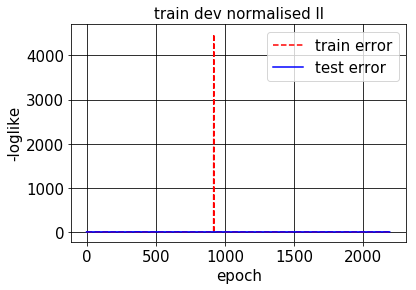

<Figure size 600x400 with 0 Axes>

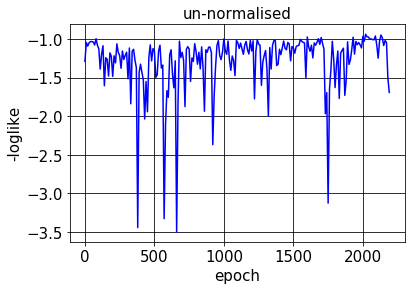

<Figure size 600x400 with 0 Axes>

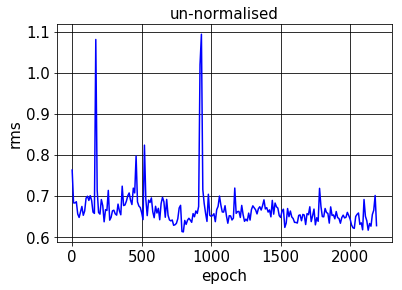

In [11]:
%matplotlib inline
from __future__ import division
import torch
from torchvision import datasets, transforms
from BNN.models import MLP_gauss
from BNN.wrapper import BNN_gauss
from BNN.train import train_BNN_regression
from src.utils import Datafeed
from src.UCI_loader import load_UCI
import numpy as np
import torch


dname = 'wine'

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
load_UCI(dset_name=dname, splits=10, seed=42, separate_targets=True, save_dir='../data/')

trainset = Datafeed(x_train, y_train, transform=None)
valset = Datafeed(x_test, y_test, transform=None)

print(x_train.shape, y_train.shape)
y_means = torch.Tensor(y_means)
y_stds = torch.Tensor(y_stds)

input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)]
output_dim = y_train.shape[1]
model = MLP_gauss(input_dim, width, depth, output_dim, flatten_image=False)

N_train = x_train.shape[0]
batch_size = 512#
nb_epochs = 2400 # We can do less iterations as this method has faster convergence
log_interval = 1

lr = 1e-2

## weight saving parameters #######
burn_in = 120 # this is in epochs 
sim_steps = 20 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 100

resample_its = 10
resample_prior_its = 50 # 45 can be choosen to better control overfitting 
re_burn = 1e7


cuda = torch.cuda.is_available()
net = BNN_gauss(model, N_train, lr=lr, cuda=cuda)

save_dir = '../saves/fc_BNN_NEW_' + dname

cost_train, cost_dev, rms_dev, ll_dev = train_BNN_regression(net, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                                 burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                                 re_burn, flat_ims=False, nb_its_dev=10, y_mu=y_means, y_std=y_stds)



# Credit (Classification)

default_credit
torch.Size([3000, 29])
(3000, 1)
27000

Net:
BNN categorical output
    Total params: 0.05M

Network:

Train:
  init cost variables:
it 0/2400, Jtr_pred = 0.523097, err = 0.220148,    time: 0.479048 seconds

    Jdev = 0.471404, err = 0.198667

best test error
it 1/2400, Jtr_pred = 0.460507, err = 0.190963,    time: 0.467346 seconds

it 2/2400, Jtr_pred = 0.448449, err = 0.187111,    time: 0.454984 seconds

it 3/2400, Jtr_pred = 0.445975, err = 0.185037,    time: 0.476616 seconds

it 4/2400, Jtr_pred = 0.441786, err = 0.184963,    time: 0.470442 seconds

it 5/2400, Jtr_pred = 0.438594, err = 0.181296,    time: 0.457600 seconds

it 6/2400, Jtr_pred = 0.437812, err = 0.182333,    time: 0.466309 seconds

it 7/2400, Jtr_pred = 0.439750, err = 0.182778,    time: 0.465564 seconds

it 8/2400, Jtr_pred = 0.437345, err = 0.181519,    time: 0.460562 seconds

it 9/2400, Jtr_pred = 0.437386, err = 0.182185,    time: 0.458546 seconds

it 10/2400, Jtr_pred = 0.436776, err = 0.179889, 

it 89/2400, Jtr_pred = 0.425662, err = 0.177593,    time: 0.473778 seconds

it 90/2400, Jtr_pred = 0.428522, err = 0.180778,    time: 0.473527 seconds

    Jdev = 0.439715, err = 0.183667

it 91/2400, Jtr_pred = 0.426403, err = 0.179704,    time: 0.485055 seconds

it 92/2400, Jtr_pred = 0.425849, err = 0.177370,    time: 0.480836 seconds

it 93/2400, Jtr_pred = 0.427252, err = 0.178037,    time: 0.482522 seconds

it 94/2400, Jtr_pred = 0.426535, err = 0.179333,    time: 0.468426 seconds

it 95/2400, Jtr_pred = 0.426339, err = 0.178148,    time: 0.452767 seconds

it 96/2400, Jtr_pred = 0.426442, err = 0.179148,    time: 0.454095 seconds

it 97/2400, Jtr_pred = 0.427686, err = 0.177667,    time: 0.461247 seconds

it 98/2400, Jtr_pred = 0.423337, err = 0.175778,    time: 0.489037 seconds

it 99/2400, Jtr_pred = 0.424654, err = 0.176926,    time: 0.460585 seconds

it 100/2400, Jtr_pred = 0.424375, err = 0.178407,    time: 0.455442 seconds

    Jdev = 0.439935, err = 0.181000

it 101/2400, 

it 179/2400, Jtr_pred = 0.423114, err = 0.178630,    time: 0.381601 seconds

it 180/2400, Jtr_pred = 0.424699, err = 0.179481,    time: 0.382327 seconds

 saving weight samples 4/100
    Jdev = 0.435558, err = 0.178333

best test error
it 181/2400, Jtr_pred = 0.425610, err = 0.179037,    time: 0.381560 seconds

it 182/2400, Jtr_pred = 0.423645, err = 0.179111,    time: 0.390687 seconds

it 183/2400, Jtr_pred = 0.423396, err = 0.178593,    time: 0.380409 seconds

it 184/2400, Jtr_pred = 0.424095, err = 0.178222,    time: 0.386905 seconds

it 185/2400, Jtr_pred = 0.422557, err = 0.178704,    time: 0.375940 seconds

it 186/2400, Jtr_pred = 0.422957, err = 0.178852,    time: 0.389645 seconds

it 187/2400, Jtr_pred = 0.424897, err = 0.180185,    time: 0.373560 seconds

it 188/2400, Jtr_pred = 0.422597, err = 0.180296,    time: 0.379829 seconds

it 189/2400, Jtr_pred = 0.423391, err = 0.178333,    time: 0.388934 seconds

it 190/2400, Jtr_pred = 0.423713, err = 0.177889,    time: 0.390241 sec

it 267/2400, Jtr_pred = 0.422611, err = 0.178074,    time: 0.389069 seconds

it 268/2400, Jtr_pred = 0.423174, err = 0.177630,    time: 0.378024 seconds

it 269/2400, Jtr_pred = 0.422891, err = 0.176741,    time: 0.384109 seconds

it 270/2400, Jtr_pred = 0.422314, err = 0.177815,    time: 0.391616 seconds

    Jdev = 0.439675, err = 0.184333

it 271/2400, Jtr_pred = 0.423514, err = 0.178074,    time: 0.380220 seconds

it 272/2400, Jtr_pred = 0.423973, err = 0.178630,    time: 0.376935 seconds

it 273/2400, Jtr_pred = 0.423762, err = 0.179407,    time: 0.382427 seconds

it 274/2400, Jtr_pred = 0.423047, err = 0.177407,    time: 0.379518 seconds

it 275/2400, Jtr_pred = 0.424933, err = 0.177000,    time: 0.386153 seconds

it 276/2400, Jtr_pred = 0.424985, err = 0.177593,    time: 0.380676 seconds

it 277/2400, Jtr_pred = 0.425358, err = 0.178074,    time: 0.379059 seconds

it 278/2400, Jtr_pred = 0.424938, err = 0.178370,    time: 0.379871 seconds

it 279/2400, Jtr_pred = 0.425120, err =

it 356/2400, Jtr_pred = 0.423553, err = 0.178481,    time: 0.376659 seconds

it 357/2400, Jtr_pred = 0.424294, err = 0.178111,    time: 0.385901 seconds

it 358/2400, Jtr_pred = 0.424030, err = 0.177593,    time: 0.380176 seconds

it 359/2400, Jtr_pred = 0.427737, err = 0.180481,    time: 0.384593 seconds

it 360/2400, Jtr_pred = 0.425091, err = 0.178481,    time: 0.388685 seconds

 saving weight samples 13/100
    Jdev = 0.438227, err = 0.188667

it 361/2400, Jtr_pred = 0.423693, err = 0.178852,    time: 0.383404 seconds

it 362/2400, Jtr_pred = 0.424559, err = 0.177259,    time: 0.394502 seconds

it 363/2400, Jtr_pred = 0.425336, err = 0.178074,    time: 0.377051 seconds

it 364/2400, Jtr_pred = 0.424446, err = 0.178926,    time: 0.386388 seconds

it 365/2400, Jtr_pred = 0.426255, err = 0.180185,    time: 0.383123 seconds

it 366/2400, Jtr_pred = 0.426086, err = 0.177259,    time: 0.383995 seconds

it 367/2400, Jtr_pred = 0.426146, err = 0.178000,    time: 0.386230 seconds

it 368/24

it 445/2400, Jtr_pred = 0.426389, err = 0.177630,    time: 0.383212 seconds

it 446/2400, Jtr_pred = 0.427060, err = 0.178519,    time: 0.385271 seconds

it 447/2400, Jtr_pred = 0.427707, err = 0.179741,    time: 0.380789 seconds

it 448/2400, Jtr_pred = 0.426483, err = 0.178074,    time: 0.381537 seconds

it 449/2400, Jtr_pred = 0.427473, err = 0.178852,    time: 0.383060 seconds

it 450/2400, Jtr_pred = 0.425955, err = 0.179370,    time: 0.384960 seconds

    Jdev = 0.434456, err = 0.182000

it 451/2400, Jtr_pred = 0.425862, err = 0.178148,    time: 0.382644 seconds

it 452/2400, Jtr_pred = 0.425210, err = 0.178148,    time: 0.387052 seconds

it 453/2400, Jtr_pred = 0.424980, err = 0.178037,    time: 0.385577 seconds

it 454/2400, Jtr_pred = 0.429326, err = 0.178963,    time: 0.378079 seconds

it 455/2400, Jtr_pred = 0.426886, err = 0.179630,    time: 0.378509 seconds

it 456/2400, Jtr_pred = 0.424455, err = 0.177037,    time: 0.386946 seconds

it 457/2400, Jtr_pred = 0.425294, err =

it 534/2400, Jtr_pred = 0.423836, err = 0.177185,    time: 0.392584 seconds

it 535/2400, Jtr_pred = 0.427703, err = 0.179593,    time: 0.399632 seconds

it 536/2400, Jtr_pred = 0.425923, err = 0.178444,    time: 0.425874 seconds

it 537/2400, Jtr_pred = 0.427514, err = 0.178111,    time: 0.418151 seconds

it 538/2400, Jtr_pred = 0.425768, err = 0.178593,    time: 0.401857 seconds

it 539/2400, Jtr_pred = 0.426713, err = 0.178259,    time: 0.420357 seconds

it 540/2400, Jtr_pred = 0.425566, err = 0.179148,    time: 0.410274 seconds

 saving weight samples 22/100
    Jdev = 0.432938, err = 0.179000

it 541/2400, Jtr_pred = 0.425379, err = 0.179037,    time: 0.436620 seconds

it 542/2400, Jtr_pred = 0.428539, err = 0.179259,    time: 0.459216 seconds

it 543/2400, Jtr_pred = 0.426889, err = 0.178148,    time: 0.429760 seconds

it 544/2400, Jtr_pred = 0.425763, err = 0.177333,    time: 0.401763 seconds

it 545/2400, Jtr_pred = 0.426004, err = 0.180037,    time: 0.405783 seconds

it 546/24

it 622/2400, Jtr_pred = 0.429104, err = 0.180741,    time: 0.396078 seconds

it 623/2400, Jtr_pred = 0.426706, err = 0.178667,    time: 0.405479 seconds

it 624/2400, Jtr_pred = 0.426464, err = 0.178593,    time: 0.388289 seconds

it 625/2400, Jtr_pred = 0.426345, err = 0.178852,    time: 0.389991 seconds

it 626/2400, Jtr_pred = 0.425292, err = 0.176963,    time: 0.395161 seconds

it 627/2400, Jtr_pred = 0.426322, err = 0.178296,    time: 0.394438 seconds

it 628/2400, Jtr_pred = 0.425644, err = 0.178889,    time: 0.384429 seconds

it 629/2400, Jtr_pred = 0.425927, err = 0.178111,    time: 0.382242 seconds

it 630/2400, Jtr_pred = 0.426794, err = 0.178815,    time: 0.393462 seconds

    Jdev = 0.432387, err = 0.178000

it 631/2400, Jtr_pred = 0.424881, err = 0.178741,    time: 0.393346 seconds

it 632/2400, Jtr_pred = 0.425601, err = 0.178519,    time: 0.387867 seconds

it 633/2400, Jtr_pred = 0.427015, err = 0.178926,    time: 0.393889 seconds

it 634/2400, Jtr_pred = 0.427734, err =

it 711/2400, Jtr_pred = 0.428300, err = 0.179481,    time: 0.395928 seconds

it 712/2400, Jtr_pred = 0.427948, err = 0.179111,    time: 0.401440 seconds

it 713/2400, Jtr_pred = 0.429016, err = 0.178593,    time: 0.400536 seconds

it 714/2400, Jtr_pred = 0.427557, err = 0.177852,    time: 0.391193 seconds

it 715/2400, Jtr_pred = 0.427079, err = 0.179222,    time: 0.399320 seconds

it 716/2400, Jtr_pred = 0.428421, err = 0.178778,    time: 0.391968 seconds

it 717/2400, Jtr_pred = 0.428200, err = 0.177926,    time: 0.388734 seconds

it 718/2400, Jtr_pred = 0.427014, err = 0.177926,    time: 0.394740 seconds

it 719/2400, Jtr_pred = 0.430169, err = 0.180074,    time: 0.400657 seconds

it 720/2400, Jtr_pred = 0.428032, err = 0.178074,    time: 0.399866 seconds

 saving weight samples 31/100
    Jdev = 0.430001, err = 0.181333

it 721/2400, Jtr_pred = 0.427950, err = 0.178630,    time: 0.388349 seconds

it 722/2400, Jtr_pred = 0.428649, err = 0.178556,    time: 0.389313 seconds

it 723/24

 saving weight samples 35/100
    Jdev = 0.431516, err = 0.183000

it 801/2400, Jtr_pred = 0.429445, err = 0.178741,    time: 0.398361 seconds

it 802/2400, Jtr_pred = 0.429649, err = 0.179407,    time: 0.389945 seconds

it 803/2400, Jtr_pred = 0.427477, err = 0.178926,    time: 0.398387 seconds

it 804/2400, Jtr_pred = 0.427572, err = 0.178926,    time: 0.383475 seconds

it 805/2400, Jtr_pred = 0.425619, err = 0.178778,    time: 0.392297 seconds

it 806/2400, Jtr_pred = 0.428171, err = 0.179185,    time: 0.394814 seconds

it 807/2400, Jtr_pred = 0.427078, err = 0.178296,    time: 0.389598 seconds

it 808/2400, Jtr_pred = 0.429030, err = 0.178444,    time: 0.389722 seconds

it 809/2400, Jtr_pred = 0.429837, err = 0.179741,    time: 0.397986 seconds

it 810/2400, Jtr_pred = 0.434620, err = 0.180630,    time: 0.388114 seconds

    Jdev = 0.431627, err = 0.180333

it 811/2400, Jtr_pred = 0.430838, err = 0.179926,    time: 0.386677 seconds

it 812/2400, Jtr_pred = 0.427809, err = 0.178296,

it 890/2400, Jtr_pred = 0.429829, err = 0.181037,    time: 0.392824 seconds

    Jdev = 0.430998, err = 0.180667

it 891/2400, Jtr_pred = 0.428972, err = 0.179111,    time: 0.396196 seconds

it 892/2400, Jtr_pred = 0.430460, err = 0.180704,    time: 0.392635 seconds

it 893/2400, Jtr_pred = 0.433237, err = 0.180111,    time: 0.390633 seconds

it 894/2400, Jtr_pred = 0.428730, err = 0.179852,    time: 0.409199 seconds

it 895/2400, Jtr_pred = 0.428581, err = 0.178593,    time: 0.403776 seconds

it 896/2400, Jtr_pred = 0.431722, err = 0.180333,    time: 0.400593 seconds

it 897/2400, Jtr_pred = 0.430926, err = 0.180185,    time: 0.401650 seconds

it 898/2400, Jtr_pred = 0.428633, err = 0.180074,    time: 0.396534 seconds

it 899/2400, Jtr_pred = 0.428118, err = 0.178630,    time: 0.387767 seconds

it 900/2400, Jtr_pred = 0.430675, err = 0.180259,    time: 0.397439 seconds

 saving weight samples 40/100
    Jdev = 0.430874, err = 0.182000

it 901/2400, Jtr_pred = 0.429759, err = 0.179889,

it 979/2400, Jtr_pred = 0.428229, err = 0.179296,    time: 0.392586 seconds

it 980/2400, Jtr_pred = 0.428200, err = 0.180111,    time: 0.391973 seconds

 saving weight samples 44/100
    Jdev = 0.430615, err = 0.180000

it 981/2400, Jtr_pred = 0.430603, err = 0.181370,    time: 0.404014 seconds

it 982/2400, Jtr_pred = 0.427667, err = 0.179481,    time: 0.399731 seconds

it 983/2400, Jtr_pred = 0.428923, err = 0.179556,    time: 0.396314 seconds

it 984/2400, Jtr_pred = 0.431750, err = 0.181481,    time: 0.401952 seconds

it 985/2400, Jtr_pred = 0.430087, err = 0.181148,    time: 0.395977 seconds

it 986/2400, Jtr_pred = 0.428872, err = 0.180037,    time: 0.399628 seconds

it 987/2400, Jtr_pred = 0.428939, err = 0.180370,    time: 0.387901 seconds

it 988/2400, Jtr_pred = 0.431923, err = 0.180481,    time: 0.391041 seconds

it 989/2400, Jtr_pred = 0.427980, err = 0.179889,    time: 0.397482 seconds

it 990/2400, Jtr_pred = 0.428896, err = 0.180333,    time: 0.391398 seconds

    Jdev 

it 1067/2400, Jtr_pred = 0.428439, err = 0.179370,    time: 0.397955 seconds

it 1068/2400, Jtr_pred = 0.429625, err = 0.179296,    time: 0.397914 seconds

it 1069/2400, Jtr_pred = 0.432044, err = 0.180444,    time: 0.394924 seconds

it 1070/2400, Jtr_pred = 0.428505, err = 0.178667,    time: 0.388683 seconds

    Jdev = 0.437038, err = 0.181667

it 1071/2400, Jtr_pred = 0.431418, err = 0.179852,    time: 0.395632 seconds

it 1072/2400, Jtr_pred = 0.426916, err = 0.179148,    time: 0.388437 seconds

it 1073/2400, Jtr_pred = 0.430099, err = 0.179407,    time: 0.401231 seconds

it 1074/2400, Jtr_pred = 0.429122, err = 0.178519,    time: 0.389724 seconds

it 1075/2400, Jtr_pred = 0.429510, err = 0.179815,    time: 0.394770 seconds

it 1076/2400, Jtr_pred = 0.428052, err = 0.178926,    time: 0.403828 seconds

it 1077/2400, Jtr_pred = 0.428396, err = 0.179370,    time: 0.388276 seconds

it 1078/2400, Jtr_pred = 0.427864, err = 0.179444,    time: 0.396420 seconds

it 1079/2400, Jtr_pred = 0.

it 1155/2400, Jtr_pred = 0.429628, err = 0.180407,    time: 0.389493 seconds

it 1156/2400, Jtr_pred = 0.429600, err = 0.179222,    time: 0.390128 seconds

it 1157/2400, Jtr_pred = 0.430839, err = 0.178667,    time: 0.390183 seconds

it 1158/2400, Jtr_pred = 0.428462, err = 0.178519,    time: 0.385245 seconds

it 1159/2400, Jtr_pred = 0.429748, err = 0.179148,    time: 0.397599 seconds

it 1160/2400, Jtr_pred = 0.428832, err = 0.178370,    time: 0.390935 seconds

 saving weight samples 53/100
    Jdev = 0.434246, err = 0.179000

it 1161/2400, Jtr_pred = 0.429463, err = 0.178889,    time: 0.397520 seconds

it 1162/2400, Jtr_pred = 0.428195, err = 0.178741,    time: 0.396834 seconds

it 1163/2400, Jtr_pred = 0.428737, err = 0.179593,    time: 0.386777 seconds

it 1164/2400, Jtr_pred = 0.428235, err = 0.178259,    time: 0.399400 seconds

it 1165/2400, Jtr_pred = 0.429339, err = 0.179741,    time: 0.388954 seconds

it 1166/2400, Jtr_pred = 0.428179, err = 0.179222,    time: 0.403325 second

it 1243/2400, Jtr_pred = 0.428046, err = 0.178593,    time: 0.371429 seconds

it 1244/2400, Jtr_pred = 0.428568, err = 0.178963,    time: 0.385558 seconds

it 1245/2400, Jtr_pred = 0.428035, err = 0.179741,    time: 0.382175 seconds

it 1246/2400, Jtr_pred = 0.428251, err = 0.178667,    time: 0.370562 seconds

it 1247/2400, Jtr_pred = 0.429252, err = 0.179741,    time: 0.369704 seconds

it 1248/2400, Jtr_pred = 0.428028, err = 0.179593,    time: 0.385031 seconds

it 1249/2400, Jtr_pred = 0.430210, err = 0.179778,    time: 0.387528 seconds

it 1250/2400, Jtr_pred = 0.429636, err = 0.179704,    time: 0.390168 seconds

    Jdev = 0.432993, err = 0.185667

it 1251/2400, Jtr_pred = 0.428103, err = 0.177704,    time: 0.383492 seconds

it 1252/2400, Jtr_pred = 0.429947, err = 0.180630,    time: 0.373622 seconds

it 1253/2400, Jtr_pred = 0.430444, err = 0.180296,    time: 0.376387 seconds

it 1254/2400, Jtr_pred = 0.428238, err = 0.179074,    time: 0.379978 seconds

it 1255/2400, Jtr_pred = 0.

it 1331/2400, Jtr_pred = 0.428773, err = 0.178815,    time: 0.381412 seconds

it 1332/2400, Jtr_pred = 0.428905, err = 0.179111,    time: 0.387715 seconds

it 1333/2400, Jtr_pred = 0.429497, err = 0.180333,    time: 0.380852 seconds

it 1334/2400, Jtr_pred = 0.427938, err = 0.178963,    time: 0.382525 seconds

it 1335/2400, Jtr_pred = 0.429721, err = 0.180407,    time: 0.383205 seconds

it 1336/2400, Jtr_pred = 0.429258, err = 0.181111,    time: 0.381275 seconds

it 1337/2400, Jtr_pred = 0.428514, err = 0.178926,    time: 0.372048 seconds

it 1338/2400, Jtr_pred = 0.429000, err = 0.179407,    time: 0.378509 seconds

it 1339/2400, Jtr_pred = 0.429380, err = 0.181185,    time: 0.380075 seconds

it 1340/2400, Jtr_pred = 0.428729, err = 0.177926,    time: 0.378767 seconds

 saving weight samples 62/100
    Jdev = 0.430260, err = 0.183667

it 1341/2400, Jtr_pred = 0.427737, err = 0.180333,    time: 0.379892 seconds

it 1342/2400, Jtr_pred = 0.427166, err = 0.179259,    time: 0.388682 second

it 1420/2400, Jtr_pred = 0.430066, err = 0.179444,    time: 0.379681 seconds

 saving weight samples 66/100
    Jdev = 0.429466, err = 0.177667

it 1421/2400, Jtr_pred = 0.430011, err = 0.179148,    time: 0.381017 seconds

it 1422/2400, Jtr_pred = 0.429783, err = 0.179519,    time: 0.378989 seconds

it 1423/2400, Jtr_pred = 0.431149, err = 0.179778,    time: 0.378985 seconds

it 1424/2400, Jtr_pred = 0.428835, err = 0.180259,    time: 0.384769 seconds

it 1425/2400, Jtr_pred = 0.428439, err = 0.178778,    time: 0.384689 seconds

it 1426/2400, Jtr_pred = 0.430198, err = 0.179556,    time: 0.379297 seconds

it 1427/2400, Jtr_pred = 0.428992, err = 0.179556,    time: 0.387865 seconds

it 1428/2400, Jtr_pred = 0.427792, err = 0.179259,    time: 0.380140 seconds

it 1429/2400, Jtr_pred = 0.429838, err = 0.179222,    time: 0.374849 seconds

it 1430/2400, Jtr_pred = 0.428384, err = 0.179852,    time: 0.375989 seconds

    Jdev = 0.431591, err = 0.182667

it 1431/2400, Jtr_pred = 0.430552, err

it 1508/2400, Jtr_pred = 0.430349, err = 0.178667,    time: 0.383769 seconds

it 1509/2400, Jtr_pred = 0.430623, err = 0.179370,    time: 0.370610 seconds

it 1510/2400, Jtr_pred = 0.427387, err = 0.180481,    time: 0.380439 seconds

    Jdev = 0.429776, err = 0.178667

it 1511/2400, Jtr_pred = 0.427448, err = 0.179000,    time: 0.388989 seconds

it 1512/2400, Jtr_pred = 0.429229, err = 0.179296,    time: 0.378071 seconds

it 1513/2400, Jtr_pred = 0.430230, err = 0.178963,    time: 0.372268 seconds

it 1514/2400, Jtr_pred = 0.429995, err = 0.178852,    time: 0.385123 seconds

it 1515/2400, Jtr_pred = 0.429864, err = 0.179889,    time: 0.379785 seconds

it 1516/2400, Jtr_pred = 0.427805, err = 0.178481,    time: 0.378905 seconds

it 1517/2400, Jtr_pred = 0.427712, err = 0.178593,    time: 0.373949 seconds

it 1518/2400, Jtr_pred = 0.428528, err = 0.176889,    time: 0.391487 seconds

it 1519/2400, Jtr_pred = 0.428308, err = 0.179667,    time: 0.381573 seconds

it 1520/2400, Jtr_pred = 0.

it 1596/2400, Jtr_pred = 0.429193, err = 0.179481,    time: 0.395177 seconds

it 1597/2400, Jtr_pred = 0.429091, err = 0.180000,    time: 0.378448 seconds

it 1598/2400, Jtr_pred = 0.427794, err = 0.179593,    time: 0.376912 seconds

it 1599/2400, Jtr_pred = 0.427831, err = 0.179889,    time: 0.380120 seconds

it 1600/2400, Jtr_pred = 0.430007, err = 0.179556,    time: 0.375529 seconds

 saving weight samples 75/100
    Jdev = 0.431791, err = 0.177000

it 1601/2400, Jtr_pred = 0.430637, err = 0.180074,    time: 0.378917 seconds

it 1602/2400, Jtr_pred = 0.429971, err = 0.180667,    time: 0.379150 seconds

it 1603/2400, Jtr_pred = 0.428863, err = 0.179259,    time: 0.392992 seconds

it 1604/2400, Jtr_pred = 0.427973, err = 0.179519,    time: 0.378805 seconds

it 1605/2400, Jtr_pred = 0.430195, err = 0.180704,    time: 0.378530 seconds

it 1606/2400, Jtr_pred = 0.428792, err = 0.180556,    time: 0.376680 seconds

it 1607/2400, Jtr_pred = 0.427986, err = 0.178519,    time: 0.388396 second

it 1684/2400, Jtr_pred = 0.428840, err = 0.179296,    time: 0.374660 seconds

it 1685/2400, Jtr_pred = 0.428755, err = 0.178556,    time: 0.382992 seconds

it 1686/2400, Jtr_pred = 0.428257, err = 0.179741,    time: 0.375010 seconds

it 1687/2400, Jtr_pred = 0.428496, err = 0.178741,    time: 0.381567 seconds

it 1688/2400, Jtr_pred = 0.428758, err = 0.180407,    time: 0.387430 seconds

it 1689/2400, Jtr_pred = 0.428520, err = 0.179222,    time: 0.376822 seconds

it 1690/2400, Jtr_pred = 0.428123, err = 0.179333,    time: 0.398011 seconds

    Jdev = 0.433378, err = 0.181667

it 1691/2400, Jtr_pred = 0.428095, err = 0.179259,    time: 0.380106 seconds

it 1692/2400, Jtr_pred = 0.427801, err = 0.179667,    time: 0.394678 seconds

it 1693/2400, Jtr_pred = 0.428643, err = 0.179481,    time: 0.385713 seconds

it 1694/2400, Jtr_pred = 0.428596, err = 0.179778,    time: 0.374021 seconds

it 1695/2400, Jtr_pred = 0.429078, err = 0.178519,    time: 0.383777 seconds

it 1696/2400, Jtr_pred = 0.

it 1772/2400, Jtr_pred = 0.428586, err = 0.179370,    time: 0.397116 seconds

it 1773/2400, Jtr_pred = 0.428333, err = 0.178704,    time: 0.386528 seconds

it 1774/2400, Jtr_pred = 0.427962, err = 0.179593,    time: 0.382403 seconds

it 1775/2400, Jtr_pred = 0.428451, err = 0.178667,    time: 0.386202 seconds

it 1776/2400, Jtr_pred = 0.429674, err = 0.180333,    time: 0.382430 seconds

it 1777/2400, Jtr_pred = 0.428565, err = 0.180778,    time: 0.391127 seconds

it 1778/2400, Jtr_pred = 0.428092, err = 0.179370,    time: 0.383135 seconds

it 1779/2400, Jtr_pred = 0.428965, err = 0.179519,    time: 0.396179 seconds

it 1780/2400, Jtr_pred = 0.427296, err = 0.179000,    time: 0.373437 seconds

 saving weight samples 84/100
    Jdev = 0.430603, err = 0.180667

it 1781/2400, Jtr_pred = 0.428606, err = 0.178889,    time: 0.381564 seconds

it 1782/2400, Jtr_pred = 0.428021, err = 0.179259,    time: 0.380379 seconds

it 1783/2400, Jtr_pred = 0.429177, err = 0.181481,    time: 0.383492 second

 saving weight samples 88/100
    Jdev = 0.429378, err = 0.181667

it 1861/2400, Jtr_pred = 0.427555, err = 0.179741,    time: 0.375175 seconds

it 1862/2400, Jtr_pred = 0.427300, err = 0.179444,    time: 0.392062 seconds

it 1863/2400, Jtr_pred = 0.427829, err = 0.177778,    time: 0.380028 seconds

it 1864/2400, Jtr_pred = 0.429530, err = 0.180037,    time: 0.383429 seconds

it 1865/2400, Jtr_pred = 0.429453, err = 0.178296,    time: 0.383799 seconds

it 1866/2400, Jtr_pred = 0.429264, err = 0.180148,    time: 0.379244 seconds

it 1867/2400, Jtr_pred = 0.428364, err = 0.178926,    time: 0.380722 seconds

it 1868/2400, Jtr_pred = 0.428709, err = 0.178852,    time: 0.378372 seconds

it 1869/2400, Jtr_pred = 0.429685, err = 0.179778,    time: 0.372407 seconds

it 1870/2400, Jtr_pred = 0.430412, err = 0.179963,    time: 0.375320 seconds

    Jdev = 0.432091, err = 0.185667

it 1871/2400, Jtr_pred = 0.428266, err = 0.179037,    time: 0.387932 seconds

it 1872/2400, Jtr_pred = 0.429791, err

it 1949/2400, Jtr_pred = 0.432477, err = 0.181000,    time: 0.382139 seconds

it 1950/2400, Jtr_pred = 0.429061, err = 0.178815,    time: 0.384542 seconds

    Jdev = 0.430120, err = 0.180000

it 1951/2400, Jtr_pred = 0.427868, err = 0.177259,    time: 0.376298 seconds

it 1952/2400, Jtr_pred = 0.432518, err = 0.180667,    time: 0.376093 seconds

it 1953/2400, Jtr_pred = 0.429321, err = 0.178667,    time: 0.377744 seconds

it 1954/2400, Jtr_pred = 0.428046, err = 0.178148,    time: 0.380312 seconds

it 1955/2400, Jtr_pred = 0.430454, err = 0.179741,    time: 0.381680 seconds

it 1956/2400, Jtr_pred = 0.428156, err = 0.180185,    time: 0.378823 seconds

it 1957/2400, Jtr_pred = 0.431143, err = 0.180111,    time: 0.381932 seconds

it 1958/2400, Jtr_pred = 0.428138, err = 0.179667,    time: 0.377217 seconds

it 1959/2400, Jtr_pred = 0.427469, err = 0.178296,    time: 0.377901 seconds

it 1960/2400, Jtr_pred = 0.427473, err = 0.180074,    time: 0.377985 seconds

 saving weight samples 93/1

it 2037/2400, Jtr_pred = 0.428373, err = 0.178889,    time: 0.381933 seconds

it 2038/2400, Jtr_pred = 0.428446, err = 0.179222,    time: 0.376125 seconds

it 2039/2400, Jtr_pred = 0.428716, err = 0.178963,    time: 0.374118 seconds

it 2040/2400, Jtr_pred = 0.427857, err = 0.179407,    time: 0.393678 seconds

 saving weight samples 97/100
    Jdev = 0.429658, err = 0.179667

it 2041/2400, Jtr_pred = 0.429804, err = 0.178630,    time: 0.379958 seconds

it 2042/2400, Jtr_pred = 0.429447, err = 0.179630,    time: 0.379910 seconds

it 2043/2400, Jtr_pred = 0.428102, err = 0.178407,    time: 0.373758 seconds

it 2044/2400, Jtr_pred = 0.428037, err = 0.177370,    time: 0.381492 seconds

it 2045/2400, Jtr_pred = 0.428954, err = 0.178926,    time: 0.382539 seconds

it 2046/2400, Jtr_pred = 0.427254, err = 0.178630,    time: 0.385431 seconds

it 2047/2400, Jtr_pred = 0.428847, err = 0.178370,    time: 0.370393 seconds

it 2048/2400, Jtr_pred = 0.428992, err = 0.179444,    time: 0.388426 second

it 2125/2400, Jtr_pred = 0.429574, err = 0.180407,    time: 0.386810 seconds

it 2126/2400, Jtr_pred = 0.428742, err = 0.179296,    time: 0.379296 seconds

it 2127/2400, Jtr_pred = 0.431132, err = 0.179148,    time: 0.378068 seconds

it 2128/2400, Jtr_pred = 0.428504, err = 0.178889,    time: 0.383780 seconds

it 2129/2400, Jtr_pred = 0.429117, err = 0.179074,    time: 0.392325 seconds

it 2130/2400, Jtr_pred = 0.428127, err = 0.179963,    time: 0.379023 seconds

    Jdev = 0.432133, err = 0.183333

it 2131/2400, Jtr_pred = 0.428527, err = 0.179778,    time: 0.388470 seconds

it 2132/2400, Jtr_pred = 0.429856, err = 0.180222,    time: 0.389990 seconds

it 2133/2400, Jtr_pred = 0.431214, err = 0.179556,    time: 0.383048 seconds

it 2134/2400, Jtr_pred = 0.428191, err = 0.179852,    time: 0.376425 seconds

it 2135/2400, Jtr_pred = 0.428566, err = 0.179333,    time: 0.382654 seconds

it 2136/2400, Jtr_pred = 0.430548, err = 0.181074,    time: 0.379983 seconds

it 2137/2400, Jtr_pred = 0.

it 2213/2400, Jtr_pred = 0.428237, err = 0.179000,    time: 0.382263 seconds

it 2214/2400, Jtr_pred = 0.429591, err = 0.179630,    time: 0.384386 seconds

it 2215/2400, Jtr_pred = 0.426257, err = 0.177926,    time: 0.386404 seconds

it 2216/2400, Jtr_pred = 0.430267, err = 0.179185,    time: 0.390323 seconds

it 2217/2400, Jtr_pred = 0.428218, err = 0.180111,    time: 0.373293 seconds

it 2218/2400, Jtr_pred = 0.427081, err = 0.179667,    time: 0.375167 seconds

it 2219/2400, Jtr_pred = 0.426832, err = 0.178556,    time: 0.393450 seconds

it 2220/2400, Jtr_pred = 0.428546, err = 0.179222,    time: 0.385690 seconds

 saving weight samples 100/100
    Jdev = 0.432002, err = 0.179667

it 2221/2400, Jtr_pred = 0.427846, err = 0.179259,    time: 0.379918 seconds

it 2222/2400, Jtr_pred = 0.426669, err = 0.178556,    time: 0.376551 seconds

it 2223/2400, Jtr_pred = 0.426474, err = 0.179074,    time: 0.388717 seconds

it 2224/2400, Jtr_pred = 0.427527, err = 0.179593,    time: 0.392658 secon

    Jdev = 0.430940, err = 0.183667

it 2301/2400, Jtr_pred = 0.427485, err = 0.179519,    time: 0.379389 seconds

it 2302/2400, Jtr_pred = 0.427927, err = 0.179444,    time: 0.378716 seconds

it 2303/2400, Jtr_pred = 0.428623, err = 0.178148,    time: 0.387272 seconds

it 2304/2400, Jtr_pred = 0.428333, err = 0.179148,    time: 0.382597 seconds

it 2305/2400, Jtr_pred = 0.428443, err = 0.178556,    time: 0.388267 seconds

it 2306/2400, Jtr_pred = 0.429153, err = 0.178852,    time: 0.388222 seconds

it 2307/2400, Jtr_pred = 0.429135, err = 0.180148,    time: 0.388741 seconds

it 2308/2400, Jtr_pred = 0.428969, err = 0.178370,    time: 0.384108 seconds

it 2309/2400, Jtr_pred = 0.428595, err = 0.178852,    time: 0.384958 seconds

it 2310/2400, Jtr_pred = 0.427509, err = 0.179000,    time: 0.380685 seconds

    Jdev = 0.429887, err = 0.181333

it 2311/2400, Jtr_pred = 0.426247, err = 0.177815,    time: 0.391900 seconds

it 2312/2400, Jtr_pred = 0.426227, err = 0.178444,    time: 0.380799

it 2389/2400, Jtr_pred = 0.428048, err = 0.178593,    time: 0.377217 seconds

it 2390/2400, Jtr_pred = 0.427786, err = 0.177926,    time: 0.383016 seconds

    Jdev = 0.428606, err = 0.181333

it 2391/2400, Jtr_pred = 0.428507, err = 0.177370,    time: 0.374229 seconds

it 2392/2400, Jtr_pred = 0.430030, err = 0.181630,    time: 0.377120 seconds

it 2393/2400, Jtr_pred = 0.428435, err = 0.179296,    time: 0.375520 seconds

it 2394/2400, Jtr_pred = 0.428284, err = 0.178370,    time: 0.379562 seconds

it 2395/2400, Jtr_pred = 0.428348, err = 0.178296,    time: 0.379539 seconds

it 2396/2400, Jtr_pred = 0.428525, err = 0.179111,    time: 0.382156 seconds

it 2397/2400, Jtr_pred = 0.427621, err = 0.178815,    time: 0.380500 seconds

it 2398/2400, Jtr_pred = 0.428979, err = 0.179185,    time: 0.379093 seconds

it 2399/2400, Jtr_pred = 0.426510, err = 0.178444,    time: 0.395962 seconds

   average time: 0.407355 seconds



<Figure size 600x400 with 0 Axes>

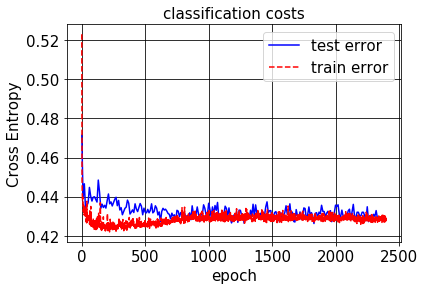

<Figure size 600x400 with 0 Axes>

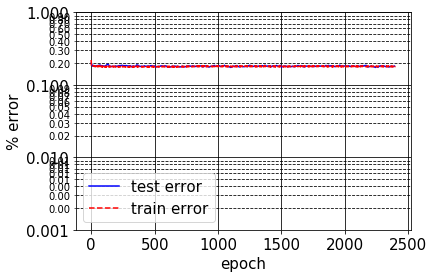

In [12]:
from __future__ import division
import torch
from src.UCI_loader import load_UCI, unnormalise_cat_vars
from src.gauss_cat import gauss_cat_to_flat
import numpy as np
from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification
from src.utils import Datafeed


x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
load_UCI(dset_name='default_credit', splits=10, seed=42, separate_targets=True, save_dir='../data/')

input_dim_vec = [1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1]


x_train = unnormalise_cat_vars(x_train, x_means, x_stds, input_dim_vec)
x_test = unnormalise_cat_vars(x_test, x_means, x_stds, input_dim_vec)

x_train_flat = gauss_cat_to_flat(torch.Tensor(x_train), input_dim_vec)
x_test_flat = gauss_cat_to_flat(torch.Tensor(x_test), input_dim_vec)

y_train = unnormalise_cat_vars(y_train, y_means, y_stds, [2])
y_test = unnormalise_cat_vars(y_test, y_means, y_stds, [2])

y_train_flat = gauss_cat_to_flat(torch.Tensor(y_train), [2])
y_test_flat = gauss_cat_to_flat(torch.Tensor(y_test), [2])


dname = 'default_credit'
print(dname)

print(x_test_flat.shape)
print(y_test.shape)

trainset = Datafeed(x_train_flat, torch.Tensor(y_train).squeeze(1), transform=None)
valset = Datafeed(x_test_flat, torch.Tensor(y_test).squeeze(1), transform=None)

input_dim = x_train_flat.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)]
output_dim = 2
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = len(trainset)
print(N_train)
batch_size = 512#
nb_epochs = 2400 # We can do less iterations as this method has faster convergence

lr = 1e-2

## weight saving parameters #######
burn_in = 120 # this is in epochs 
sim_steps = 20 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 100

resample_its = 10
resample_prior_its = 50
re_burn = 1e7

nb_its_dev = 10

cuda = torch.cuda.is_available()
net = BNN_cat(model, N_train, lr=lr, cuda=cuda)

save_dir = '../saves/fc_BNN_NEW_' + dname

cost_train, cost_dev, err_train, err_dev = train_BNN_classification(net, save_dir, batch_size,
                         nb_epochs, trainset, valset, cuda,
                         burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                         re_burn, flat_ims=False, nb_its_dev=nb_its_dev)
# 



# COMPAS (Classification)







compas
(5554, 17)
(618,)
5554

Net:
BNN categorical output
    Total params: 0.04M

Network:

Train:
  init cost variables:
it 0/2400, Jtr_pred = 0.666316, err = 0.364422,    time: 0.191137 seconds

    Jdev = 0.611043, err = 0.220065

best test error
it 1/2400, Jtr_pred = 0.561881, err = 0.179330,    time: 0.208388 seconds

it 2/2400, Jtr_pred = 0.458812, err = 0.109831,    time: 0.210337 seconds

it 3/2400, Jtr_pred = 0.383169, err = 0.068959,    time: 0.197548 seconds

it 4/2400, Jtr_pred = 0.294309, err = 0.056176,    time: 0.193140 seconds

it 5/2400, Jtr_pred = 0.207585, err = 0.047533,    time: 0.188942 seconds

it 6/2400, Jtr_pred = 0.168170, err = 0.037631,    time: 0.191832 seconds

it 7/2400, Jtr_pred = 0.147129, err = 0.030969,    time: 0.191599 seconds

it 8/2400, Jtr_pred = 0.138969, err = 0.031869,    time: 0.191882 seconds

it 9/2400, Jtr_pred = 0.126003, err = 0.031869,    time: 0.206544 seconds

it 10/2400, Jtr_pred = 0.123381, err = 0.030609,    time: 0.190954 

it 90/2400, Jtr_pred = 0.112734, err = 0.030248,    time: 0.191642 seconds

    Jdev = 0.100829, err = 0.022654

it 91/2400, Jtr_pred = 0.113195, err = 0.030248,    time: 0.204794 seconds

it 92/2400, Jtr_pred = 0.116087, err = 0.030789,    time: 0.197876 seconds

it 93/2400, Jtr_pred = 0.113330, err = 0.030609,    time: 0.192369 seconds

it 94/2400, Jtr_pred = 0.112411, err = 0.030969,    time: 0.207886 seconds

it 95/2400, Jtr_pred = 0.117076, err = 0.030429,    time: 0.207635 seconds

it 96/2400, Jtr_pred = 0.122453, err = 0.034030,    time: 0.194099 seconds

it 97/2400, Jtr_pred = 0.122763, err = 0.030609,    time: 0.193430 seconds

it 98/2400, Jtr_pred = 0.126051, err = 0.032949,    time: 0.207332 seconds

it 99/2400, Jtr_pred = 0.126845, err = 0.035110,    time: 0.195975 seconds

it 100/2400, Jtr_pred = 0.115748, err = 0.030068,    time: 0.194590 seconds

    Jdev = 0.102211, err = 0.022654

it 101/2400, Jtr_pred = 0.119504, err = 0.032229,    time: 0.205960 seconds

it 102/2400,

it 180/2400, Jtr_pred = 0.113901, err = 0.029888,    time: 0.174851 seconds

 saving weight samples 4/100
    Jdev = 0.106560, err = 0.021036

it 181/2400, Jtr_pred = 0.113051, err = 0.030248,    time: 0.176282 seconds

it 182/2400, Jtr_pred = 0.111226, err = 0.030789,    time: 0.187877 seconds

it 183/2400, Jtr_pred = 0.113620, err = 0.030609,    time: 0.182515 seconds

it 184/2400, Jtr_pred = 0.118964, err = 0.031329,    time: 0.180543 seconds

it 185/2400, Jtr_pred = 0.116876, err = 0.030429,    time: 0.193835 seconds

it 186/2400, Jtr_pred = 0.121047, err = 0.031329,    time: 0.176423 seconds

it 187/2400, Jtr_pred = 0.116718, err = 0.031509,    time: 0.179297 seconds

it 188/2400, Jtr_pred = 0.119812, err = 0.031329,    time: 0.195645 seconds

it 189/2400, Jtr_pred = 0.119297, err = 0.031689,    time: 0.173717 seconds

it 190/2400, Jtr_pred = 0.119540, err = 0.031689,    time: 0.176277 seconds

    Jdev = 0.099129, err = 0.021036

it 191/2400, Jtr_pred = 0.119740, err = 0.030429, 

it 269/2400, Jtr_pred = 0.116695, err = 0.030429,    time: 0.176590 seconds

it 270/2400, Jtr_pred = 0.116019, err = 0.030609,    time: 0.173803 seconds

    Jdev = 0.104759, err = 0.022654

it 271/2400, Jtr_pred = 0.112243, err = 0.031689,    time: 0.174711 seconds

it 272/2400, Jtr_pred = 0.113533, err = 0.030969,    time: 0.176369 seconds

it 273/2400, Jtr_pred = 0.116075, err = 0.031149,    time: 0.174589 seconds

it 274/2400, Jtr_pred = 0.115640, err = 0.030248,    time: 0.179228 seconds

it 275/2400, Jtr_pred = 0.118106, err = 0.032229,    time: 0.180503 seconds

it 276/2400, Jtr_pred = 0.115158, err = 0.029888,    time: 0.178443 seconds

it 277/2400, Jtr_pred = 0.114601, err = 0.030789,    time: 0.176119 seconds

it 278/2400, Jtr_pred = 0.122725, err = 0.031149,    time: 0.175870 seconds

it 279/2400, Jtr_pred = 0.119047, err = 0.031509,    time: 0.173515 seconds

it 280/2400, Jtr_pred = 0.121698, err = 0.032049,    time: 0.183101 seconds

 saving weight samples 9/100
    Jdev =

it 358/2400, Jtr_pred = 0.114702, err = 0.030789,    time: 0.177797 seconds

it 359/2400, Jtr_pred = 0.117801, err = 0.030248,    time: 0.177591 seconds

it 360/2400, Jtr_pred = 0.127196, err = 0.032769,    time: 0.173570 seconds

 saving weight samples 13/100
    Jdev = 0.107486, err = 0.025890

it 361/2400, Jtr_pred = 0.112766, err = 0.030609,    time: 0.187441 seconds

it 362/2400, Jtr_pred = 0.117929, err = 0.030068,    time: 0.174883 seconds

it 363/2400, Jtr_pred = 0.118432, err = 0.031149,    time: 0.177293 seconds

it 364/2400, Jtr_pred = 0.116455, err = 0.030429,    time: 0.174929 seconds

it 365/2400, Jtr_pred = 0.120114, err = 0.033489,    time: 0.175511 seconds

it 366/2400, Jtr_pred = 0.124965, err = 0.032409,    time: 0.178667 seconds

it 367/2400, Jtr_pred = 0.115666, err = 0.031689,    time: 0.176639 seconds

it 368/2400, Jtr_pred = 0.109144, err = 0.030068,    time: 0.177724 seconds

it 369/2400, Jtr_pred = 0.112539, err = 0.030429,    time: 0.178200 seconds

it 370/24

it 447/2400, Jtr_pred = 0.110618, err = 0.030248,    time: 0.181049 seconds

it 448/2400, Jtr_pred = 0.111156, err = 0.030429,    time: 0.191973 seconds

it 449/2400, Jtr_pred = 0.120955, err = 0.030789,    time: 0.177907 seconds

it 450/2400, Jtr_pred = 0.114307, err = 0.030068,    time: 0.180688 seconds

    Jdev = 0.107569, err = 0.022654

it 451/2400, Jtr_pred = 0.119967, err = 0.029888,    time: 0.177175 seconds

it 452/2400, Jtr_pred = 0.109783, err = 0.030068,    time: 0.186150 seconds

it 453/2400, Jtr_pred = 0.113592, err = 0.030429,    time: 0.175549 seconds

it 454/2400, Jtr_pred = 0.109945, err = 0.030429,    time: 0.181022 seconds

it 455/2400, Jtr_pred = 0.110961, err = 0.030068,    time: 0.181773 seconds

it 456/2400, Jtr_pred = 0.117620, err = 0.030789,    time: 0.175883 seconds

it 457/2400, Jtr_pred = 0.118622, err = 0.031509,    time: 0.188081 seconds

it 458/2400, Jtr_pred = 0.116625, err = 0.030429,    time: 0.174367 seconds

it 459/2400, Jtr_pred = 0.113976, err =

it 536/2400, Jtr_pred = 0.112910, err = 0.030248,    time: 0.176844 seconds

it 537/2400, Jtr_pred = 0.112620, err = 0.030429,    time: 0.185642 seconds

it 538/2400, Jtr_pred = 0.116991, err = 0.031509,    time: 0.175552 seconds

it 539/2400, Jtr_pred = 0.122480, err = 0.032049,    time: 0.175284 seconds

it 540/2400, Jtr_pred = 0.128764, err = 0.031869,    time: 0.175958 seconds

 saving weight samples 22/100
    Jdev = 0.102514, err = 0.024272

it 541/2400, Jtr_pred = 0.126377, err = 0.030969,    time: 0.175840 seconds

it 542/2400, Jtr_pred = 0.115168, err = 0.030068,    time: 0.174283 seconds

it 543/2400, Jtr_pred = 0.112736, err = 0.030068,    time: 0.177029 seconds

it 544/2400, Jtr_pred = 0.115917, err = 0.030248,    time: 0.175104 seconds

it 545/2400, Jtr_pred = 0.121702, err = 0.030609,    time: 0.191776 seconds

it 546/2400, Jtr_pred = 0.127306, err = 0.033129,    time: 0.173534 seconds

it 547/2400, Jtr_pred = 0.113433, err = 0.031149,    time: 0.177199 seconds

it 548/24

it 625/2400, Jtr_pred = 0.122945, err = 0.032409,    time: 0.173449 seconds

it 626/2400, Jtr_pred = 0.117864, err = 0.031149,    time: 0.176587 seconds

it 627/2400, Jtr_pred = 0.116854, err = 0.030789,    time: 0.192147 seconds

it 628/2400, Jtr_pred = 0.129470, err = 0.034210,    time: 0.175382 seconds

it 629/2400, Jtr_pred = 0.142314, err = 0.034030,    time: 0.193301 seconds

it 630/2400, Jtr_pred = 0.130052, err = 0.031149,    time: 0.181001 seconds

    Jdev = 0.102377, err = 0.022654

it 631/2400, Jtr_pred = 0.114713, err = 0.029888,    time: 0.175373 seconds

it 632/2400, Jtr_pred = 0.119502, err = 0.030068,    time: 0.176314 seconds

it 633/2400, Jtr_pred = 0.112016, err = 0.029888,    time: 0.177873 seconds

it 634/2400, Jtr_pred = 0.116340, err = 0.029708,    time: 0.177097 seconds

it 635/2400, Jtr_pred = 0.114330, err = 0.030609,    time: 0.180173 seconds

it 636/2400, Jtr_pred = 0.112287, err = 0.030248,    time: 0.179504 seconds

it 637/2400, Jtr_pred = 0.113642, err =

it 714/2400, Jtr_pred = 0.113554, err = 0.030429,    time: 0.177160 seconds

it 715/2400, Jtr_pred = 0.111861, err = 0.030429,    time: 0.174076 seconds

it 716/2400, Jtr_pred = 0.114910, err = 0.029708,    time: 0.192247 seconds

it 717/2400, Jtr_pred = 0.120503, err = 0.030789,    time: 0.177768 seconds

it 718/2400, Jtr_pred = 0.113013, err = 0.030248,    time: 0.189132 seconds

it 719/2400, Jtr_pred = 0.114725, err = 0.031149,    time: 0.180014 seconds

it 720/2400, Jtr_pred = 0.114171, err = 0.030789,    time: 0.175082 seconds

 saving weight samples 31/100
    Jdev = 0.109406, err = 0.022654

it 721/2400, Jtr_pred = 0.118570, err = 0.031329,    time: 0.178854 seconds

it 722/2400, Jtr_pred = 0.117394, err = 0.030609,    time: 0.176457 seconds

it 723/2400, Jtr_pred = 0.111694, err = 0.029708,    time: 0.180858 seconds

it 724/2400, Jtr_pred = 0.112168, err = 0.029888,    time: 0.175422 seconds

it 725/2400, Jtr_pred = 0.115114, err = 0.029888,    time: 0.194201 seconds

it 726/24

it 803/2400, Jtr_pred = 0.125407, err = 0.031509,    time: 0.177906 seconds

it 804/2400, Jtr_pred = 0.127499, err = 0.032229,    time: 0.191134 seconds

it 805/2400, Jtr_pred = 0.119835, err = 0.030248,    time: 0.176045 seconds

it 806/2400, Jtr_pred = 0.123829, err = 0.031509,    time: 0.182625 seconds

it 807/2400, Jtr_pred = 0.119894, err = 0.030429,    time: 0.177558 seconds

it 808/2400, Jtr_pred = 0.119820, err = 0.030789,    time: 0.177639 seconds

it 809/2400, Jtr_pred = 0.123102, err = 0.030969,    time: 0.192639 seconds

it 810/2400, Jtr_pred = 0.128976, err = 0.034030,    time: 0.177016 seconds

    Jdev = 0.101365, err = 0.021036

it 811/2400, Jtr_pred = 0.113892, err = 0.031869,    time: 0.175586 seconds

it 812/2400, Jtr_pred = 0.115260, err = 0.030609,    time: 0.175396 seconds

it 813/2400, Jtr_pred = 0.114685, err = 0.030429,    time: 0.191701 seconds

it 814/2400, Jtr_pred = 0.116181, err = 0.031149,    time: 0.176898 seconds

it 815/2400, Jtr_pred = 0.120586, err =

it 892/2400, Jtr_pred = 0.116014, err = 0.030429,    time: 0.174710 seconds

it 893/2400, Jtr_pred = 0.118185, err = 0.030429,    time: 0.189681 seconds

it 894/2400, Jtr_pred = 0.115604, err = 0.030789,    time: 0.192044 seconds

it 895/2400, Jtr_pred = 0.115098, err = 0.030068,    time: 0.179648 seconds

it 896/2400, Jtr_pred = 0.117561, err = 0.030068,    time: 0.176866 seconds

it 897/2400, Jtr_pred = 0.116468, err = 0.030248,    time: 0.194290 seconds

it 898/2400, Jtr_pred = 0.117499, err = 0.030609,    time: 0.175694 seconds

it 899/2400, Jtr_pred = 0.116053, err = 0.030429,    time: 0.180757 seconds

it 900/2400, Jtr_pred = 0.116327, err = 0.030429,    time: 0.177771 seconds

 saving weight samples 40/100
    Jdev = 0.095627, err = 0.021036

it 901/2400, Jtr_pred = 0.117380, err = 0.031149,    time: 0.175597 seconds

it 902/2400, Jtr_pred = 0.119779, err = 0.030969,    time: 0.176133 seconds

it 903/2400, Jtr_pred = 0.117406, err = 0.030609,    time: 0.177802 seconds

it 904/24

    Jdev = 0.105387, err = 0.021036

it 981/2400, Jtr_pred = 0.118593, err = 0.030969,    time: 0.176457 seconds

it 982/2400, Jtr_pred = 0.114302, err = 0.030609,    time: 0.175449 seconds

it 983/2400, Jtr_pred = 0.114881, err = 0.030969,    time: 0.174192 seconds

it 984/2400, Jtr_pred = 0.117566, err = 0.030789,    time: 0.176876 seconds

it 985/2400, Jtr_pred = 0.124980, err = 0.032949,    time: 0.179820 seconds

it 986/2400, Jtr_pred = 0.115528, err = 0.030969,    time: 0.192301 seconds

it 987/2400, Jtr_pred = 0.111978, err = 0.030068,    time: 0.188669 seconds

it 988/2400, Jtr_pred = 0.111563, err = 0.030248,    time: 0.177342 seconds

it 989/2400, Jtr_pred = 0.114336, err = 0.030609,    time: 0.179784 seconds

it 990/2400, Jtr_pred = 0.116131, err = 0.030969,    time: 0.177341 seconds

    Jdev = 0.098271, err = 0.021036

it 991/2400, Jtr_pred = 0.114819, err = 0.030068,    time: 0.191617 seconds

it 992/2400, Jtr_pred = 0.115188, err = 0.030429,    time: 0.191104 seconds

it

it 1069/2400, Jtr_pred = 0.115418, err = 0.030429,    time: 0.188601 seconds

it 1070/2400, Jtr_pred = 0.115432, err = 0.030609,    time: 0.176876 seconds

    Jdev = 0.098270, err = 0.021036

it 1071/2400, Jtr_pred = 0.116911, err = 0.030248,    time: 0.173768 seconds

it 1072/2400, Jtr_pred = 0.112668, err = 0.030248,    time: 0.177244 seconds

it 1073/2400, Jtr_pred = 0.114436, err = 0.030609,    time: 0.177361 seconds

it 1074/2400, Jtr_pred = 0.115145, err = 0.030068,    time: 0.184800 seconds

it 1075/2400, Jtr_pred = 0.115330, err = 0.030609,    time: 0.176775 seconds

it 1076/2400, Jtr_pred = 0.114852, err = 0.030248,    time: 0.188948 seconds

it 1077/2400, Jtr_pred = 0.114046, err = 0.030789,    time: 0.180623 seconds

it 1078/2400, Jtr_pred = 0.114076, err = 0.030969,    time: 0.176881 seconds

it 1079/2400, Jtr_pred = 0.115469, err = 0.030969,    time: 0.176744 seconds

it 1080/2400, Jtr_pred = 0.117135, err = 0.030969,    time: 0.177627 seconds

 saving weight samples 49/1

it 1157/2400, Jtr_pred = 0.115098, err = 0.030248,    time: 0.175314 seconds

it 1158/2400, Jtr_pred = 0.122344, err = 0.030789,    time: 0.178214 seconds

it 1159/2400, Jtr_pred = 0.116886, err = 0.030429,    time: 0.178832 seconds

it 1160/2400, Jtr_pred = 0.116042, err = 0.030429,    time: 0.179340 seconds

 saving weight samples 53/100
    Jdev = 0.094615, err = 0.021036

it 1161/2400, Jtr_pred = 0.115366, err = 0.030068,    time: 0.181631 seconds

it 1162/2400, Jtr_pred = 0.119338, err = 0.030429,    time: 0.179453 seconds

it 1163/2400, Jtr_pred = 0.114162, err = 0.030609,    time: 0.174430 seconds

it 1164/2400, Jtr_pred = 0.113069, err = 0.030429,    time: 0.176961 seconds

it 1165/2400, Jtr_pred = 0.112593, err = 0.030429,    time: 0.176307 seconds

it 1166/2400, Jtr_pred = 0.116054, err = 0.030969,    time: 0.176914 seconds

it 1167/2400, Jtr_pred = 0.113608, err = 0.030248,    time: 0.174164 seconds

it 1168/2400, Jtr_pred = 0.114943, err = 0.030609,    time: 0.189388 second

it 1245/2400, Jtr_pred = 0.112963, err = 0.030068,    time: 0.211387 seconds

it 1246/2400, Jtr_pred = 0.115266, err = 0.029888,    time: 0.190815 seconds

it 1247/2400, Jtr_pred = 0.123572, err = 0.029888,    time: 0.190356 seconds

it 1248/2400, Jtr_pred = 0.113111, err = 0.030068,    time: 0.174593 seconds

it 1249/2400, Jtr_pred = 0.121705, err = 0.033669,    time: 0.182946 seconds

it 1250/2400, Jtr_pred = 0.114738, err = 0.030068,    time: 0.175882 seconds

    Jdev = 0.095493, err = 0.021036

it 1251/2400, Jtr_pred = 0.115119, err = 0.030248,    time: 0.177545 seconds

it 1252/2400, Jtr_pred = 0.115091, err = 0.030429,    time: 0.188073 seconds

it 1253/2400, Jtr_pred = 0.117241, err = 0.030969,    time: 0.175757 seconds

it 1254/2400, Jtr_pred = 0.111927, err = 0.030248,    time: 0.178105 seconds

it 1255/2400, Jtr_pred = 0.118406, err = 0.030609,    time: 0.178821 seconds

it 1256/2400, Jtr_pred = 0.119897, err = 0.030969,    time: 0.175107 seconds

it 1257/2400, Jtr_pred = 0.

it 1333/2400, Jtr_pred = 0.113225, err = 0.029888,    time: 0.179796 seconds

it 1334/2400, Jtr_pred = 0.114145, err = 0.030068,    time: 0.180811 seconds

it 1335/2400, Jtr_pred = 0.113947, err = 0.030248,    time: 0.182275 seconds

it 1336/2400, Jtr_pred = 0.116975, err = 0.030789,    time: 0.180053 seconds

it 1337/2400, Jtr_pred = 0.112882, err = 0.030068,    time: 0.179189 seconds

it 1338/2400, Jtr_pred = 0.117401, err = 0.030248,    time: 0.179783 seconds

it 1339/2400, Jtr_pred = 0.114379, err = 0.030248,    time: 0.177175 seconds

it 1340/2400, Jtr_pred = 0.112268, err = 0.030248,    time: 0.181441 seconds

 saving weight samples 62/100
    Jdev = 0.088457, err = 0.021036

it 1341/2400, Jtr_pred = 0.110952, err = 0.030248,    time: 0.181391 seconds

it 1342/2400, Jtr_pred = 0.111361, err = 0.030248,    time: 0.172400 seconds

it 1343/2400, Jtr_pred = 0.115375, err = 0.030429,    time: 0.179331 seconds

it 1344/2400, Jtr_pred = 0.118242, err = 0.030609,    time: 0.177676 second

    Jdev = 0.092908, err = 0.021036

it 1421/2400, Jtr_pred = 0.119420, err = 0.030429,    time: 0.190871 seconds

it 1422/2400, Jtr_pred = 0.116378, err = 0.030429,    time: 0.174960 seconds

it 1423/2400, Jtr_pred = 0.113952, err = 0.030609,    time: 0.178994 seconds

it 1424/2400, Jtr_pred = 0.114989, err = 0.030429,    time: 0.178906 seconds

it 1425/2400, Jtr_pred = 0.114575, err = 0.030609,    time: 0.175996 seconds

it 1426/2400, Jtr_pred = 0.112326, err = 0.030248,    time: 0.176922 seconds

it 1427/2400, Jtr_pred = 0.111664, err = 0.030248,    time: 0.176577 seconds

it 1428/2400, Jtr_pred = 0.120307, err = 0.030248,    time: 0.175337 seconds

it 1429/2400, Jtr_pred = 0.137915, err = 0.030609,    time: 0.175872 seconds

it 1430/2400, Jtr_pred = 0.114596, err = 0.030609,    time: 0.176716 seconds

    Jdev = 0.094226, err = 0.021036

it 1431/2400, Jtr_pred = 0.113598, err = 0.030248,    time: 0.191361 seconds

it 1432/2400, Jtr_pred = 0.112044, err = 0.030248,    time: 0.174490

it 1509/2400, Jtr_pred = 0.120096, err = 0.032049,    time: 0.183495 seconds

it 1510/2400, Jtr_pred = 0.117230, err = 0.030248,    time: 0.181141 seconds

    Jdev = 0.101570, err = 0.021036

it 1511/2400, Jtr_pred = 0.133444, err = 0.030969,    time: 0.177402 seconds

it 1512/2400, Jtr_pred = 0.157257, err = 0.034570,    time: 0.177891 seconds

it 1513/2400, Jtr_pred = 0.125365, err = 0.031689,    time: 0.179931 seconds

it 1514/2400, Jtr_pred = 0.128884, err = 0.032589,    time: 0.179208 seconds

it 1515/2400, Jtr_pred = 0.122751, err = 0.031689,    time: 0.176766 seconds

it 1516/2400, Jtr_pred = 0.118096, err = 0.030429,    time: 0.190289 seconds

it 1517/2400, Jtr_pred = 0.123163, err = 0.030248,    time: 0.193942 seconds

it 1518/2400, Jtr_pred = 0.122001, err = 0.030248,    time: 0.177571 seconds

it 1519/2400, Jtr_pred = 0.113806, err = 0.030429,    time: 0.178853 seconds

it 1520/2400, Jtr_pred = 0.114606, err = 0.030248,    time: 0.180321 seconds

 saving weight samples 71/1

it 1597/2400, Jtr_pred = 0.117384, err = 0.030248,    time: 0.173855 seconds

it 1598/2400, Jtr_pred = 0.115730, err = 0.030248,    time: 0.177710 seconds

it 1599/2400, Jtr_pred = 0.113516, err = 0.030248,    time: 0.176454 seconds

it 1600/2400, Jtr_pred = 0.115082, err = 0.030248,    time: 0.186510 seconds

 saving weight samples 75/100
    Jdev = 0.096752, err = 0.021036

it 1601/2400, Jtr_pred = 0.112979, err = 0.030248,    time: 0.177900 seconds

it 1602/2400, Jtr_pred = 0.117304, err = 0.030429,    time: 0.176069 seconds

it 1603/2400, Jtr_pred = 0.115945, err = 0.030429,    time: 0.178552 seconds

it 1604/2400, Jtr_pred = 0.132161, err = 0.032589,    time: 0.178668 seconds

it 1605/2400, Jtr_pred = 0.122528, err = 0.030969,    time: 0.178304 seconds

it 1606/2400, Jtr_pred = 0.120467, err = 0.030609,    time: 0.177141 seconds

it 1607/2400, Jtr_pred = 0.119471, err = 0.030248,    time: 0.185245 seconds

it 1608/2400, Jtr_pred = 0.117503, err = 0.030789,    time: 0.182576 second

it 1685/2400, Jtr_pred = 0.120664, err = 0.030429,    time: 0.176051 seconds

it 1686/2400, Jtr_pred = 0.116160, err = 0.030068,    time: 0.178300 seconds

it 1687/2400, Jtr_pred = 0.118197, err = 0.030609,    time: 0.176532 seconds

it 1688/2400, Jtr_pred = 0.119941, err = 0.030969,    time: 0.175482 seconds

it 1689/2400, Jtr_pred = 0.124422, err = 0.032949,    time: 0.176704 seconds

it 1690/2400, Jtr_pred = 0.126677, err = 0.031329,    time: 0.180093 seconds

    Jdev = 0.097782, err = 0.021036

it 1691/2400, Jtr_pred = 0.121257, err = 0.030609,    time: 0.177988 seconds

it 1692/2400, Jtr_pred = 0.113777, err = 0.030609,    time: 0.177294 seconds

it 1693/2400, Jtr_pred = 0.117827, err = 0.030248,    time: 0.176242 seconds

it 1694/2400, Jtr_pred = 0.116572, err = 0.030789,    time: 0.174596 seconds

it 1695/2400, Jtr_pred = 0.117608, err = 0.030789,    time: 0.188169 seconds

it 1696/2400, Jtr_pred = 0.116833, err = 0.030429,    time: 0.173213 seconds

it 1697/2400, Jtr_pred = 0.

it 1773/2400, Jtr_pred = 0.117860, err = 0.030429,    time: 0.180258 seconds

it 1774/2400, Jtr_pred = 0.114851, err = 0.030248,    time: 0.178612 seconds

it 1775/2400, Jtr_pred = 0.117149, err = 0.030429,    time: 0.176531 seconds

it 1776/2400, Jtr_pred = 0.117353, err = 0.030609,    time: 0.176846 seconds

it 1777/2400, Jtr_pred = 0.116204, err = 0.030789,    time: 0.180656 seconds

it 1778/2400, Jtr_pred = 0.115726, err = 0.030609,    time: 0.179500 seconds

it 1779/2400, Jtr_pred = 0.115521, err = 0.030248,    time: 0.176530 seconds

it 1780/2400, Jtr_pred = 0.118365, err = 0.030789,    time: 0.180268 seconds

 saving weight samples 84/100
    Jdev = 0.096020, err = 0.022654

it 1781/2400, Jtr_pred = 0.118711, err = 0.030609,    time: 0.180254 seconds

it 1782/2400, Jtr_pred = 0.121073, err = 0.031689,    time: 0.178188 seconds

it 1783/2400, Jtr_pred = 0.119190, err = 0.030248,    time: 0.175660 seconds

it 1784/2400, Jtr_pred = 0.127608, err = 0.031149,    time: 0.178874 second

    Jdev = 0.095478, err = 0.021036

it 1861/2400, Jtr_pred = 0.116165, err = 0.030609,    time: 0.177685 seconds

it 1862/2400, Jtr_pred = 0.113663, err = 0.030429,    time: 0.176643 seconds

it 1863/2400, Jtr_pred = 0.115349, err = 0.030609,    time: 0.176145 seconds

it 1864/2400, Jtr_pred = 0.115263, err = 0.030429,    time: 0.177125 seconds

it 1865/2400, Jtr_pred = 0.119326, err = 0.030429,    time: 0.176401 seconds

it 1866/2400, Jtr_pred = 0.115551, err = 0.031149,    time: 0.178934 seconds

it 1867/2400, Jtr_pred = 0.127658, err = 0.030789,    time: 0.180238 seconds

it 1868/2400, Jtr_pred = 0.118280, err = 0.030609,    time: 0.179169 seconds

it 1869/2400, Jtr_pred = 0.120070, err = 0.031149,    time: 0.175781 seconds

it 1870/2400, Jtr_pred = 0.119586, err = 0.030429,    time: 0.178267 seconds

    Jdev = 0.096064, err = 0.021036

it 1871/2400, Jtr_pred = 0.117464, err = 0.030248,    time: 0.180466 seconds

it 1872/2400, Jtr_pred = 0.115251, err = 0.030609,    time: 0.180609

it 1949/2400, Jtr_pred = 0.133351, err = 0.032769,    time: 0.188730 seconds

it 1950/2400, Jtr_pred = 0.118043, err = 0.030248,    time: 0.191899 seconds

    Jdev = 0.093643, err = 0.021036

it 1951/2400, Jtr_pred = 0.114435, err = 0.030248,    time: 0.179018 seconds

it 1952/2400, Jtr_pred = 0.116435, err = 0.030969,    time: 0.176915 seconds

it 1953/2400, Jtr_pred = 0.114806, err = 0.030429,    time: 0.192671 seconds

it 1954/2400, Jtr_pred = 0.119409, err = 0.030068,    time: 0.191091 seconds

it 1955/2400, Jtr_pred = 0.122666, err = 0.030969,    time: 0.177238 seconds

it 1956/2400, Jtr_pred = 0.121709, err = 0.030248,    time: 0.189162 seconds

it 1957/2400, Jtr_pred = 0.120257, err = 0.030429,    time: 0.188423 seconds

it 1958/2400, Jtr_pred = 0.117127, err = 0.030789,    time: 0.177013 seconds

it 1959/2400, Jtr_pred = 0.115041, err = 0.030248,    time: 0.191541 seconds

it 1960/2400, Jtr_pred = 0.113869, err = 0.030609,    time: 0.177490 seconds

 saving weight samples 93/1

it 2037/2400, Jtr_pred = 0.122365, err = 0.030429,    time: 0.172497 seconds

it 2038/2400, Jtr_pred = 0.138378, err = 0.034930,    time: 0.185646 seconds

it 2039/2400, Jtr_pred = 0.162192, err = 0.043212,    time: 0.189455 seconds

it 2040/2400, Jtr_pred = 0.129471, err = 0.032229,    time: 0.180436 seconds

 saving weight samples 97/100
    Jdev = 0.100283, err = 0.021036

it 2041/2400, Jtr_pred = 0.120639, err = 0.030248,    time: 0.176285 seconds

it 2042/2400, Jtr_pred = 0.119201, err = 0.030248,    time: 0.193237 seconds

it 2043/2400, Jtr_pred = 0.115082, err = 0.030429,    time: 0.191429 seconds

it 2044/2400, Jtr_pred = 0.117255, err = 0.030609,    time: 0.187458 seconds

it 2045/2400, Jtr_pred = 0.120113, err = 0.030248,    time: 0.178507 seconds

it 2046/2400, Jtr_pred = 0.118938, err = 0.030248,    time: 0.193298 seconds

it 2047/2400, Jtr_pred = 0.127622, err = 0.030789,    time: 0.175358 seconds

it 2048/2400, Jtr_pred = 0.127403, err = 0.030789,    time: 0.186100 second

it 2125/2400, Jtr_pred = 0.115970, err = 0.030789,    time: 0.176727 seconds

it 2126/2400, Jtr_pred = 0.117794, err = 0.030248,    time: 0.174235 seconds

it 2127/2400, Jtr_pred = 0.113397, err = 0.030248,    time: 0.190731 seconds

it 2128/2400, Jtr_pred = 0.114853, err = 0.030429,    time: 0.176737 seconds

it 2129/2400, Jtr_pred = 0.116304, err = 0.030789,    time: 0.176765 seconds

it 2130/2400, Jtr_pred = 0.132152, err = 0.030789,    time: 0.189863 seconds

    Jdev = 0.098730, err = 0.021036

it 2131/2400, Jtr_pred = 0.121977, err = 0.030248,    time: 0.177534 seconds

it 2132/2400, Jtr_pred = 0.115490, err = 0.030068,    time: 0.190417 seconds

it 2133/2400, Jtr_pred = 0.116526, err = 0.030609,    time: 0.179146 seconds

it 2134/2400, Jtr_pred = 0.116882, err = 0.030248,    time: 0.177343 seconds

it 2135/2400, Jtr_pred = 0.119033, err = 0.030969,    time: 0.178199 seconds

it 2136/2400, Jtr_pred = 0.117299, err = 0.030789,    time: 0.179099 seconds

it 2137/2400, Jtr_pred = 0.

it 2213/2400, Jtr_pred = 0.117981, err = 0.030248,    time: 0.195523 seconds

it 2214/2400, Jtr_pred = 0.118708, err = 0.030609,    time: 0.191012 seconds

it 2215/2400, Jtr_pred = 0.122078, err = 0.030429,    time: 0.188436 seconds

it 2216/2400, Jtr_pred = 0.127124, err = 0.030789,    time: 0.176539 seconds

it 2217/2400, Jtr_pred = 0.114100, err = 0.030429,    time: 0.176012 seconds

it 2218/2400, Jtr_pred = 0.115952, err = 0.030068,    time: 0.190910 seconds

it 2219/2400, Jtr_pred = 0.117474, err = 0.030248,    time: 0.181302 seconds

it 2220/2400, Jtr_pred = 0.122775, err = 0.030609,    time: 0.178549 seconds

 saving weight samples 100/100
    Jdev = 0.093992, err = 0.021036

it 2221/2400, Jtr_pred = 0.115068, err = 0.030248,    time: 0.180472 seconds

it 2222/2400, Jtr_pred = 0.117314, err = 0.030248,    time: 0.189042 seconds

it 2223/2400, Jtr_pred = 0.114697, err = 0.030248,    time: 0.175146 seconds

it 2224/2400, Jtr_pred = 0.116298, err = 0.030429,    time: 0.189928 secon

    Jdev = 0.093917, err = 0.021036

it 2301/2400, Jtr_pred = 0.115960, err = 0.030248,    time: 0.192581 seconds

it 2302/2400, Jtr_pred = 0.119148, err = 0.030248,    time: 0.179464 seconds

it 2303/2400, Jtr_pred = 0.121690, err = 0.030789,    time: 0.187954 seconds

it 2304/2400, Jtr_pred = 0.115764, err = 0.030248,    time: 0.194857 seconds

it 2305/2400, Jtr_pred = 0.121138, err = 0.030248,    time: 0.187300 seconds

it 2306/2400, Jtr_pred = 0.121718, err = 0.030969,    time: 0.176633 seconds

it 2307/2400, Jtr_pred = 0.119896, err = 0.030429,    time: 0.191500 seconds

it 2308/2400, Jtr_pred = 0.118755, err = 0.030429,    time: 0.187621 seconds

it 2309/2400, Jtr_pred = 0.122296, err = 0.030429,    time: 0.179025 seconds

it 2310/2400, Jtr_pred = 0.155369, err = 0.037270,    time: 0.192383 seconds

    Jdev = 0.093689, err = 0.021036

it 2311/2400, Jtr_pred = 0.125348, err = 0.031149,    time: 0.174418 seconds

it 2312/2400, Jtr_pred = 0.115565, err = 0.030248,    time: 0.189400

it 2389/2400, Jtr_pred = 0.117986, err = 0.030068,    time: 0.174926 seconds

it 2390/2400, Jtr_pred = 0.114412, err = 0.030068,    time: 0.188777 seconds

    Jdev = 0.094663, err = 0.021036

it 2391/2400, Jtr_pred = 0.119523, err = 0.030609,    time: 0.174930 seconds

it 2392/2400, Jtr_pred = 0.117234, err = 0.031149,    time: 0.175403 seconds

it 2393/2400, Jtr_pred = 0.111294, err = 0.030429,    time: 0.174968 seconds

it 2394/2400, Jtr_pred = 0.113687, err = 0.030248,    time: 0.189234 seconds

it 2395/2400, Jtr_pred = 0.115764, err = 0.030609,    time: 0.179661 seconds

it 2396/2400, Jtr_pred = 0.114633, err = 0.030068,    time: 0.187084 seconds

it 2397/2400, Jtr_pred = 0.116002, err = 0.030248,    time: 0.189771 seconds

it 2398/2400, Jtr_pred = 0.118022, err = 0.030969,    time: 0.176233 seconds

it 2399/2400, Jtr_pred = 0.114730, err = 0.030789,    time: 0.177501 seconds

   average time: 0.196177 seconds



<Figure size 600x400 with 0 Axes>

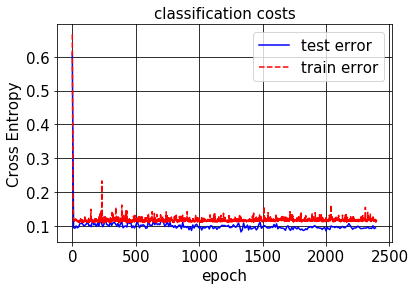

<Figure size 600x400 with 0 Axes>

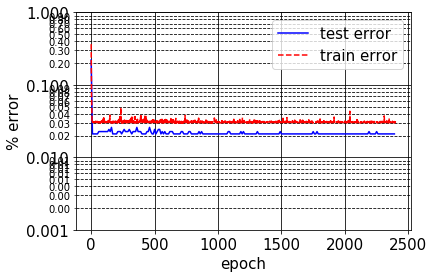

In [13]:
from __future__ import division
import torch
from src.UCI_loader import load_UCI, unnormalise_cat_vars
from src.gauss_cat import gauss_cat_to_flat
import numpy as np
from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification
from src.utils import Datafeed


dname = 'compas'

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
input_dim_vec = X_dims_to_input_dim_vec(X_dims)

print(dname)

print(x_train.shape)
print(y_test.shape)

trainset = Datafeed(x_train, torch.Tensor(y_train), transform=None)
valset = Datafeed(x_test, torch.Tensor(y_test), transform=None)


input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)]
output_dim = 2
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = len(trainset)
print(N_train)
batch_size = 512#
nb_epochs = 2400 # We can do less iterations as this method has faster convergence

lr = 1e-2

## weight saving parameters #######
burn_in = 120 # this is in epochs 
sim_steps = 20 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 100

resample_its = 10
resample_prior_its = 50
re_burn = 1e7

nb_its_dev = 10

cuda = torch.cuda.is_available()
net = BNN_cat(model, N_train, lr=lr, cuda=cuda)

save_dir = '../saves/fc_BNN_NEW_' + dname

cost_train, cost_dev, err_train, err_dev = train_BNN_classification(net, save_dir, batch_size,
                         nb_epochs, trainset, valset, cuda,
                         burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                         re_burn, flat_ims=False, nb_its_dev=nb_its_dev)
# 



# LSAT (regression)




Net:
 Creating Net!! 
BNN gaussian output
    Total params: 0.04M

Network:

Train:
  init cost variables:
it 0/2200, Jtr_pred = 1.397847,    time: 0.370933 seconds

    Jdev = 1.370377 

 Loglike = -1.2991, rms = 0.8860

best test error
it 1/2200, Jtr_pred = 1.348404,    time: 0.353671 seconds

it 2/2200, Jtr_pred = 1.345889,    time: 0.359888 seconds

it 3/2200, Jtr_pred = 1.347838,    time: 0.363117 seconds

it 4/2200, Jtr_pred = 1.346057,    time: 0.365996 seconds

it 5/2200, Jtr_pred = 1.346000,    time: 0.356606 seconds

it 6/2200, Jtr_pred = 1.346136,    time: 0.370348 seconds

it 7/2200, Jtr_pred = 1.344055,    time: 0.360933 seconds

it 8/2200, Jtr_pred = 1.352817,    time: 0.373289 seconds

it 9/2200, Jtr_pred = 1.347059,    time: 0.354082 seconds

it 10/2200, Jtr_pred = 1.345107,    time: 0.365099 seconds

    Jdev = 1.358140 

 Loglike = -1.2868, rms = 0.8758

best test error
it 11/2200, Jtr_pred = 1.345669,    time: 0.361922 seconds

it 12/2200, Jtr_pred = 1.344925,    

it 105/2200, Jtr_pred = 1.349933,    time: 0.359183 seconds

it 106/2200, Jtr_pred = 1.342591,    time: 0.357780 seconds

it 107/2200, Jtr_pred = 1.342554,    time: 0.358402 seconds

it 108/2200, Jtr_pred = 1.341875,    time: 0.370401 seconds

it 109/2200, Jtr_pred = 1.341320,    time: 0.367158 seconds

it 110/2200, Jtr_pred = 1.340010,    time: 0.374601 seconds

    Jdev = 1.371390 

 Loglike = -1.3001, rms = 0.8822

it 111/2200, Jtr_pred = 1.346355,    time: 0.373336 seconds

it 112/2200, Jtr_pred = 1.342485,    time: 0.364110 seconds

it 113/2200, Jtr_pred = 1.341262,    time: 0.380092 seconds

it 114/2200, Jtr_pred = 1.342279,    time: 0.368923 seconds

it 115/2200, Jtr_pred = 1.350764,    time: 0.358858 seconds

it 116/2200, Jtr_pred = 1.342259,    time: 0.384982 seconds

it 117/2200, Jtr_pred = 1.348640,    time: 0.359647 seconds

it 118/2200, Jtr_pred = 1.341342,    time: 0.361860 seconds

it 119/2200, Jtr_pred = 1.342223,    time: 0.356496 seconds

it 120/2200, Jtr_pred = 1.342

it 209/2200, Jtr_pred = 1.342208,    time: 0.302410 seconds

it 210/2200, Jtr_pred = 1.340635,    time: 0.309090 seconds

    Jdev = 1.382125 

 Loglike = -1.3108, rms = 0.8858

it 211/2200, Jtr_pred = 1.350948,    time: 0.307199 seconds

it 212/2200, Jtr_pred = 1.341099,    time: 0.304470 seconds

it 213/2200, Jtr_pred = 1.342149,    time: 0.298439 seconds

it 214/2200, Jtr_pred = 1.339868,    time: 0.309758 seconds

it 215/2200, Jtr_pred = 1.342725,    time: 0.306034 seconds

it 216/2200, Jtr_pred = 1.342429,    time: 0.306987 seconds

it 217/2200, Jtr_pred = 1.344830,    time: 0.304215 seconds

it 218/2200, Jtr_pred = 1.342396,    time: 0.322220 seconds

it 219/2200, Jtr_pred = 1.343961,    time: 0.303679 seconds

it 220/2200, Jtr_pred = 1.341330,    time: 0.299199 seconds

 saving weight samples 6/100
    Jdev = 1.364949 

 Loglike = -1.2936, rms = 0.8747

it 221/2200, Jtr_pred = 1.342828,    time: 0.308188 seconds

it 222/2200, Jtr_pred = 1.343125,    time: 0.306501 seconds

it 22

it 312/2200, Jtr_pred = 1.339884,    time: 0.302541 seconds

it 313/2200, Jtr_pred = 1.342097,    time: 0.300792 seconds

it 314/2200, Jtr_pred = 1.340974,    time: 0.296277 seconds

it 315/2200, Jtr_pred = 1.343767,    time: 0.306814 seconds

it 316/2200, Jtr_pred = 1.342491,    time: 0.308051 seconds

it 317/2200, Jtr_pred = 1.340296,    time: 0.314399 seconds

it 318/2200, Jtr_pred = 1.340618,    time: 0.299002 seconds

it 319/2200, Jtr_pred = 1.341988,    time: 0.301868 seconds

it 320/2200, Jtr_pred = 1.340922,    time: 0.302031 seconds

 saving weight samples 11/100
    Jdev = 1.360639 

 Loglike = -1.2893, rms = 0.8753

it 321/2200, Jtr_pred = 1.342221,    time: 0.310631 seconds

it 322/2200, Jtr_pred = 1.340784,    time: 0.312463 seconds

it 323/2200, Jtr_pred = 1.344183,    time: 0.297915 seconds

it 324/2200, Jtr_pred = 1.341227,    time: 0.308053 seconds

it 325/2200, Jtr_pred = 1.341271,    time: 0.306129 seconds

it 326/2200, Jtr_pred = 1.340375,    time: 0.302468 seconds


it 416/2200, Jtr_pred = 1.340408,    time: 0.307536 seconds

it 417/2200, Jtr_pred = 1.340058,    time: 0.300257 seconds

it 418/2200, Jtr_pred = 1.339617,    time: 0.302700 seconds

it 419/2200, Jtr_pred = 1.340285,    time: 0.307964 seconds

it 420/2200, Jtr_pred = 1.340554,    time: 0.298130 seconds

 saving weight samples 16/100
    Jdev = 1.358477 

 Loglike = -1.2872, rms = 0.8755

it 421/2200, Jtr_pred = 1.340282,    time: 0.309060 seconds

it 422/2200, Jtr_pred = 1.340626,    time: 0.310711 seconds

it 423/2200, Jtr_pred = 1.339449,    time: 0.303085 seconds

it 424/2200, Jtr_pred = 1.340129,    time: 0.304112 seconds

it 425/2200, Jtr_pred = 1.340093,    time: 0.302420 seconds

it 426/2200, Jtr_pred = 1.340565,    time: 0.318298 seconds

it 427/2200, Jtr_pred = 1.341007,    time: 0.301034 seconds

it 428/2200, Jtr_pred = 1.337970,    time: 0.307314 seconds

it 429/2200, Jtr_pred = 1.341413,    time: 0.298763 seconds

it 430/2200, Jtr_pred = 1.340090,    time: 0.298394 seconds


it 520/2200, Jtr_pred = 1.341377,    time: 0.307526 seconds

 saving weight samples 21/100
    Jdev = 1.356451 

 Loglike = -1.2851, rms = 0.8749

it 521/2200, Jtr_pred = 1.342635,    time: 0.305546 seconds

it 522/2200, Jtr_pred = 1.340673,    time: 0.307277 seconds

it 523/2200, Jtr_pred = 1.340063,    time: 0.302400 seconds

it 524/2200, Jtr_pred = 1.340488,    time: 0.313946 seconds

it 525/2200, Jtr_pred = 1.342414,    time: 0.300704 seconds

it 526/2200, Jtr_pred = 1.341396,    time: 0.305203 seconds

it 527/2200, Jtr_pred = 1.342665,    time: 0.304549 seconds

it 528/2200, Jtr_pred = 1.340728,    time: 0.301287 seconds

it 529/2200, Jtr_pred = 1.339973,    time: 0.310510 seconds

it 530/2200, Jtr_pred = 1.339928,    time: 0.305564 seconds

    Jdev = 1.361326 

 Loglike = -1.2900, rms = 0.8764

it 531/2200, Jtr_pred = 1.341140,    time: 0.299905 seconds

it 532/2200, Jtr_pred = 1.339533,    time: 0.304541 seconds

it 533/2200, Jtr_pred = 1.340734,    time: 0.296431 seconds

it 5

it 623/2200, Jtr_pred = 1.341741,    time: 0.301452 seconds

it 624/2200, Jtr_pred = 1.339206,    time: 0.306585 seconds

it 625/2200, Jtr_pred = 1.339623,    time: 0.303772 seconds

it 626/2200, Jtr_pred = 1.341991,    time: 0.307306 seconds

it 627/2200, Jtr_pred = 1.342421,    time: 0.306710 seconds

it 628/2200, Jtr_pred = 1.340293,    time: 0.308838 seconds

it 629/2200, Jtr_pred = 1.340742,    time: 0.301176 seconds

it 630/2200, Jtr_pred = 1.342649,    time: 0.300709 seconds

    Jdev = 1.356741 

 Loglike = -1.2854, rms = 0.8733

it 631/2200, Jtr_pred = 1.340151,    time: 0.304012 seconds

it 632/2200, Jtr_pred = 1.341260,    time: 0.299837 seconds

it 633/2200, Jtr_pred = 1.343497,    time: 0.300876 seconds

it 634/2200, Jtr_pred = 1.340634,    time: 0.303110 seconds

it 635/2200, Jtr_pred = 1.339267,    time: 0.305308 seconds

it 636/2200, Jtr_pred = 1.340606,    time: 0.302182 seconds

it 637/2200, Jtr_pred = 1.343362,    time: 0.300274 seconds

it 638/2200, Jtr_pred = 1.340

it 727/2200, Jtr_pred = 1.344309,    time: 0.313542 seconds

it 728/2200, Jtr_pred = 1.339849,    time: 0.313409 seconds

it 729/2200, Jtr_pred = 1.341777,    time: 0.297596 seconds

it 730/2200, Jtr_pred = 1.341108,    time: 0.312203 seconds

    Jdev = 1.362792 

 Loglike = -1.2915, rms = 0.8743

it 731/2200, Jtr_pred = 1.342912,    time: 0.300817 seconds

it 732/2200, Jtr_pred = 1.343351,    time: 0.305429 seconds

it 733/2200, Jtr_pred = 1.343494,    time: 0.301925 seconds

it 734/2200, Jtr_pred = 1.341700,    time: 0.306079 seconds

it 735/2200, Jtr_pred = 1.340908,    time: 0.298463 seconds

it 736/2200, Jtr_pred = 1.340230,    time: 0.302255 seconds

it 737/2200, Jtr_pred = 1.340922,    time: 0.306318 seconds

it 738/2200, Jtr_pred = 1.344207,    time: 0.302878 seconds

it 739/2200, Jtr_pred = 1.342504,    time: 0.303840 seconds

it 740/2200, Jtr_pred = 1.340751,    time: 0.307493 seconds

 saving weight samples 32/100
    Jdev = 1.368615 

 Loglike = -1.2973, rms = 0.8798

it 7

    Jdev = 1.362052 

 Loglike = -1.2907, rms = 0.8786

it 831/2200, Jtr_pred = 1.341763,    time: 0.303989 seconds

it 832/2200, Jtr_pred = 1.341491,    time: 0.297753 seconds

it 833/2200, Jtr_pred = 1.342332,    time: 0.298494 seconds

it 834/2200, Jtr_pred = 1.343040,    time: 0.303311 seconds

it 835/2200, Jtr_pred = 1.342781,    time: 0.302313 seconds

it 836/2200, Jtr_pred = 1.343903,    time: 0.301044 seconds

it 837/2200, Jtr_pred = 1.342106,    time: 0.302276 seconds

it 838/2200, Jtr_pred = 1.341294,    time: 0.297599 seconds

it 839/2200, Jtr_pred = 1.344964,    time: 0.303034 seconds

it 840/2200, Jtr_pred = 1.342982,    time: 0.305427 seconds

 saving weight samples 37/100
    Jdev = 1.361638 

 Loglike = -1.2903, rms = 0.8766

it 841/2200, Jtr_pred = 1.344189,    time: 0.309110 seconds

it 842/2200, Jtr_pred = 1.340891,    time: 0.313583 seconds

it 843/2200, Jtr_pred = 1.343899,    time: 0.301842 seconds

it 844/2200, Jtr_pred = 1.341360,    time: 0.312306 seconds

it 8

it 934/2200, Jtr_pred = 1.342488,    time: 0.306292 seconds

it 935/2200, Jtr_pred = 1.343003,    time: 0.302705 seconds

it 936/2200, Jtr_pred = 1.344308,    time: 0.310117 seconds

it 937/2200, Jtr_pred = 1.343497,    time: 0.304716 seconds

it 938/2200, Jtr_pred = 1.341051,    time: 0.303021 seconds

it 939/2200, Jtr_pred = 1.343482,    time: 0.305270 seconds

it 940/2200, Jtr_pred = 1.342529,    time: 0.305144 seconds

 saving weight samples 42/100
    Jdev = 1.362714 

 Loglike = -1.2914, rms = 0.8798

it 941/2200, Jtr_pred = 1.345311,    time: 0.307208 seconds

it 942/2200, Jtr_pred = 1.341356,    time: 0.299745 seconds

it 943/2200, Jtr_pred = 1.342511,    time: 0.306486 seconds

it 944/2200, Jtr_pred = 1.340588,    time: 0.301509 seconds

it 945/2200, Jtr_pred = 1.340720,    time: 0.295167 seconds

it 946/2200, Jtr_pred = 1.340712,    time: 0.300318 seconds

it 947/2200, Jtr_pred = 1.345584,    time: 0.307444 seconds

it 948/2200, Jtr_pred = 1.342794,    time: 0.301772 seconds


it 1037/2200, Jtr_pred = 1.345661,    time: 0.298130 seconds

it 1038/2200, Jtr_pred = 1.341087,    time: 0.302863 seconds

it 1039/2200, Jtr_pred = 1.340891,    time: 0.305207 seconds

it 1040/2200, Jtr_pred = 1.341949,    time: 0.301749 seconds

 saving weight samples 47/100
    Jdev = 1.356558 

 Loglike = -1.2853, rms = 0.8743

it 1041/2200, Jtr_pred = 1.340934,    time: 0.303270 seconds

it 1042/2200, Jtr_pred = 1.339940,    time: 0.297478 seconds

it 1043/2200, Jtr_pred = 1.344297,    time: 0.315096 seconds

it 1044/2200, Jtr_pred = 1.340035,    time: 0.318584 seconds

it 1045/2200, Jtr_pred = 1.342420,    time: 0.310253 seconds

it 1046/2200, Jtr_pred = 1.340520,    time: 0.304610 seconds

it 1047/2200, Jtr_pred = 1.340180,    time: 0.307150 seconds

it 1048/2200, Jtr_pred = 1.341300,    time: 0.301931 seconds

it 1049/2200, Jtr_pred = 1.342536,    time: 0.309196 seconds

it 1050/2200, Jtr_pred = 1.340545,    time: 0.305302 seconds

    Jdev = 1.378912 

 Loglike = -1.3076, rms 

it 1140/2200, Jtr_pred = 1.342829,    time: 0.305000 seconds

 saving weight samples 52/100
    Jdev = 1.375658 

 Loglike = -1.3044, rms = 0.8890

it 1141/2200, Jtr_pred = 1.344795,    time: 0.302510 seconds

it 1142/2200, Jtr_pred = 1.341120,    time: 0.308316 seconds

it 1143/2200, Jtr_pred = 1.345629,    time: 0.307174 seconds

it 1144/2200, Jtr_pred = 1.342261,    time: 0.306094 seconds

it 1145/2200, Jtr_pred = 1.350580,    time: 0.309128 seconds

it 1146/2200, Jtr_pred = 1.343954,    time: 0.304640 seconds

it 1147/2200, Jtr_pred = 1.345444,    time: 0.302433 seconds

it 1148/2200, Jtr_pred = 1.340160,    time: 0.308451 seconds

it 1149/2200, Jtr_pred = 1.341601,    time: 0.303550 seconds

it 1150/2200, Jtr_pred = 1.340822,    time: 0.310563 seconds

    Jdev = 1.359792 

 Loglike = -1.2885, rms = 0.8768

it 1151/2200, Jtr_pred = 1.340800,    time: 0.303319 seconds

it 1152/2200, Jtr_pred = 1.339341,    time: 0.310387 seconds

it 1153/2200, Jtr_pred = 1.346776,    time: 0.305676

 Loglike = -1.2872, rms = 0.8755

it 1241/2200, Jtr_pred = 1.342775,    time: 0.306391 seconds

it 1242/2200, Jtr_pred = 1.342055,    time: 0.322380 seconds

it 1243/2200, Jtr_pred = 1.344166,    time: 0.298821 seconds

it 1244/2200, Jtr_pred = 1.340280,    time: 0.304508 seconds

it 1245/2200, Jtr_pred = 1.343024,    time: 0.305463 seconds

it 1246/2200, Jtr_pred = 1.340784,    time: 0.299740 seconds

it 1247/2200, Jtr_pred = 1.341750,    time: 0.305228 seconds

it 1248/2200, Jtr_pred = 1.340246,    time: 0.310416 seconds

it 1249/2200, Jtr_pred = 1.344157,    time: 0.304055 seconds

it 1250/2200, Jtr_pred = 1.341440,    time: 0.306611 seconds

    Jdev = 1.357379 

 Loglike = -1.2861, rms = 0.8728

it 1251/2200, Jtr_pred = 1.338667,    time: 0.319026 seconds

it 1252/2200, Jtr_pred = 1.341476,    time: 0.307432 seconds

it 1253/2200, Jtr_pred = 1.345246,    time: 0.318229 seconds

it 1254/2200, Jtr_pred = 1.341809,    time: 0.303108 seconds

it 1255/2200, Jtr_pred = 1.341641,    time

it 1343/2200, Jtr_pred = 1.344150,    time: 0.307535 seconds

it 1344/2200, Jtr_pred = 1.342438,    time: 0.309281 seconds

it 1345/2200, Jtr_pred = 1.342331,    time: 0.307526 seconds

it 1346/2200, Jtr_pred = 1.345272,    time: 0.308297 seconds

it 1347/2200, Jtr_pred = 1.344231,    time: 0.310318 seconds

it 1348/2200, Jtr_pred = 1.341772,    time: 0.314307 seconds

it 1349/2200, Jtr_pred = 1.345068,    time: 0.297459 seconds

it 1350/2200, Jtr_pred = 1.340445,    time: 0.303166 seconds

    Jdev = 1.358323 

 Loglike = -1.2870, rms = 0.8740

it 1351/2200, Jtr_pred = 1.342583,    time: 0.311041 seconds

it 1352/2200, Jtr_pred = 1.340488,    time: 0.298503 seconds

it 1353/2200, Jtr_pred = 1.341522,    time: 0.300492 seconds

it 1354/2200, Jtr_pred = 1.344402,    time: 0.303324 seconds

it 1355/2200, Jtr_pred = 1.341103,    time: 0.313782 seconds

it 1356/2200, Jtr_pred = 1.343482,    time: 0.304551 seconds

it 1357/2200, Jtr_pred = 1.342255,    time: 0.313913 seconds

it 1358/2200, 

it 1446/2200, Jtr_pred = 1.340898,    time: 0.310578 seconds

it 1447/2200, Jtr_pred = 1.344256,    time: 0.303168 seconds

it 1448/2200, Jtr_pred = 1.342557,    time: 0.308197 seconds

it 1449/2200, Jtr_pred = 1.343350,    time: 0.307134 seconds

it 1450/2200, Jtr_pred = 1.341993,    time: 0.309752 seconds

    Jdev = 1.364051 

 Loglike = -1.2927, rms = 0.8797

it 1451/2200, Jtr_pred = 1.344652,    time: 0.307296 seconds

it 1452/2200, Jtr_pred = 1.341472,    time: 0.309804 seconds

it 1453/2200, Jtr_pred = 1.345100,    time: 0.307058 seconds

it 1454/2200, Jtr_pred = 1.342943,    time: 0.311805 seconds

it 1455/2200, Jtr_pred = 1.344741,    time: 0.310863 seconds

it 1456/2200, Jtr_pred = 1.341378,    time: 0.301401 seconds

it 1457/2200, Jtr_pred = 1.340671,    time: 0.308085 seconds

it 1458/2200, Jtr_pred = 1.340498,    time: 0.307768 seconds

it 1459/2200, Jtr_pred = 1.342152,    time: 0.295932 seconds

it 1460/2200, Jtr_pred = 1.341062,    time: 0.304763 seconds

 saving weight

it 1548/2200, Jtr_pred = 1.341893,    time: 0.305225 seconds

it 1549/2200, Jtr_pred = 1.344401,    time: 0.334064 seconds

it 1550/2200, Jtr_pred = 1.344350,    time: 0.308277 seconds

    Jdev = 1.361922 

 Loglike = -1.2906, rms = 0.8744

it 1551/2200, Jtr_pred = 1.342735,    time: 0.304778 seconds

it 1552/2200, Jtr_pred = 1.342482,    time: 0.297904 seconds

it 1553/2200, Jtr_pred = 1.343133,    time: 0.303416 seconds

it 1554/2200, Jtr_pred = 1.339857,    time: 0.304502 seconds

it 1555/2200, Jtr_pred = 1.342824,    time: 0.304575 seconds

it 1556/2200, Jtr_pred = 1.340441,    time: 0.305952 seconds

it 1557/2200, Jtr_pred = 1.342887,    time: 0.300545 seconds

it 1558/2200, Jtr_pred = 1.340876,    time: 0.302344 seconds

it 1559/2200, Jtr_pred = 1.344597,    time: 0.310898 seconds

it 1560/2200, Jtr_pred = 1.342057,    time: 0.305745 seconds

 saving weight samples 73/100
    Jdev = 1.354721 

 Loglike = -1.2834, rms = 0.8741

it 1561/2200, Jtr_pred = 1.341139,    time: 0.313971

    Jdev = 1.355620 

 Loglike = -1.2843, rms = 0.8736

it 1651/2200, Jtr_pred = 1.339957,    time: 0.310423 seconds

it 1652/2200, Jtr_pred = 1.340387,    time: 0.303202 seconds

it 1653/2200, Jtr_pred = 1.341916,    time: 0.303240 seconds

it 1654/2200, Jtr_pred = 1.339802,    time: 0.304301 seconds

it 1655/2200, Jtr_pred = 1.340722,    time: 0.300996 seconds

it 1656/2200, Jtr_pred = 1.340383,    time: 0.304219 seconds

it 1657/2200, Jtr_pred = 1.341670,    time: 0.302630 seconds

it 1658/2200, Jtr_pred = 1.340177,    time: 0.307296 seconds

it 1659/2200, Jtr_pred = 1.341726,    time: 0.303783 seconds

it 1660/2200, Jtr_pred = 1.340655,    time: 0.304411 seconds

 saving weight samples 78/100
    Jdev = 1.355254 

 Loglike = -1.2839, rms = 0.8732

it 1661/2200, Jtr_pred = 1.341754,    time: 0.310977 seconds

it 1662/2200, Jtr_pred = 1.341315,    time: 0.306197 seconds

it 1663/2200, Jtr_pred = 1.341568,    time: 0.299183 seconds

it 1664/2200, Jtr_pred = 1.340018,    time: 0.301298

it 1753/2200, Jtr_pred = 1.344110,    time: 0.321382 seconds

it 1754/2200, Jtr_pred = 1.340171,    time: 0.327153 seconds

it 1755/2200, Jtr_pred = 1.345345,    time: 0.327103 seconds

it 1756/2200, Jtr_pred = 1.342096,    time: 0.336378 seconds

it 1757/2200, Jtr_pred = 1.344016,    time: 0.344272 seconds

it 1758/2200, Jtr_pred = 1.341384,    time: 0.326861 seconds

it 1759/2200, Jtr_pred = 1.343406,    time: 0.326746 seconds

it 1760/2200, Jtr_pred = 1.341262,    time: 0.308064 seconds

 saving weight samples 83/100
    Jdev = 1.355961 

 Loglike = -1.2847, rms = 0.8738

it 1761/2200, Jtr_pred = 1.341317,    time: 0.320757 seconds

it 1762/2200, Jtr_pred = 1.344152,    time: 0.315864 seconds

it 1763/2200, Jtr_pred = 1.344443,    time: 0.318243 seconds

it 1764/2200, Jtr_pred = 1.340970,    time: 0.330643 seconds

it 1765/2200, Jtr_pred = 1.344511,    time: 0.312219 seconds

it 1766/2200, Jtr_pred = 1.340598,    time: 0.304906 seconds

it 1767/2200, Jtr_pred = 1.344134,    time: 0.

it 1855/2200, Jtr_pred = 1.341917,    time: 0.304260 seconds

it 1856/2200, Jtr_pred = 1.339704,    time: 0.306771 seconds

it 1857/2200, Jtr_pred = 1.343319,    time: 0.302025 seconds

it 1858/2200, Jtr_pred = 1.340938,    time: 0.301425 seconds

it 1859/2200, Jtr_pred = 1.342341,    time: 0.305377 seconds

it 1860/2200, Jtr_pred = 1.341246,    time: 0.304107 seconds

 saving weight samples 88/100
    Jdev = 1.359780 

 Loglike = -1.2885, rms = 0.8769

it 1861/2200, Jtr_pred = 1.340720,    time: 0.308191 seconds

it 1862/2200, Jtr_pred = 1.341892,    time: 0.299730 seconds

it 1863/2200, Jtr_pred = 1.341127,    time: 0.303881 seconds

it 1864/2200, Jtr_pred = 1.341500,    time: 0.308066 seconds

it 1865/2200, Jtr_pred = 1.346535,    time: 0.301462 seconds

it 1866/2200, Jtr_pred = 1.340091,    time: 0.301058 seconds

it 1867/2200, Jtr_pred = 1.344845,    time: 0.308617 seconds

it 1868/2200, Jtr_pred = 1.341670,    time: 0.300101 seconds

it 1869/2200, Jtr_pred = 1.341574,    time: 0.

it 1958/2200, Jtr_pred = 1.340337,    time: 0.308315 seconds

it 1959/2200, Jtr_pred = 1.340813,    time: 0.308021 seconds

it 1960/2200, Jtr_pred = 1.339193,    time: 0.308331 seconds

 saving weight samples 93/100
    Jdev = 1.355490 

 Loglike = -1.2842, rms = 0.8732

it 1961/2200, Jtr_pred = 1.343329,    time: 0.300632 seconds

it 1962/2200, Jtr_pred = 1.340494,    time: 0.310843 seconds

it 1963/2200, Jtr_pred = 1.340760,    time: 0.306684 seconds

it 1964/2200, Jtr_pred = 1.340456,    time: 0.307135 seconds

it 1965/2200, Jtr_pred = 1.342010,    time: 0.301560 seconds

it 1966/2200, Jtr_pred = 1.340078,    time: 0.306714 seconds

it 1967/2200, Jtr_pred = 1.341278,    time: 0.307980 seconds

it 1968/2200, Jtr_pred = 1.341132,    time: 0.309830 seconds

it 1969/2200, Jtr_pred = 1.339984,    time: 0.303948 seconds

it 1970/2200, Jtr_pred = 1.339150,    time: 0.301021 seconds

    Jdev = 1.356778 

 Loglike = -1.2855, rms = 0.8736

it 1971/2200, Jtr_pred = 1.342018,    time: 0.308800

 saving weight samples 98/100
    Jdev = 1.356489 

 Loglike = -1.2852, rms = 0.8733

it 2061/2200, Jtr_pred = 1.342290,    time: 0.304629 seconds

it 2062/2200, Jtr_pred = 1.341381,    time: 0.305021 seconds

it 2063/2200, Jtr_pred = 1.344019,    time: 0.306836 seconds

it 2064/2200, Jtr_pred = 1.341102,    time: 0.313264 seconds

it 2065/2200, Jtr_pred = 1.346461,    time: 0.303845 seconds

it 2066/2200, Jtr_pred = 1.341860,    time: 0.312530 seconds

it 2067/2200, Jtr_pred = 1.341764,    time: 0.303623 seconds

it 2068/2200, Jtr_pred = 1.341927,    time: 0.311093 seconds

it 2069/2200, Jtr_pred = 1.341602,    time: 0.306912 seconds

it 2070/2200, Jtr_pred = 1.341191,    time: 0.298767 seconds

    Jdev = 1.355976 

 Loglike = -1.2847, rms = 0.8741

it 2071/2200, Jtr_pred = 1.342271,    time: 0.307259 seconds

it 2072/2200, Jtr_pred = 1.340468,    time: 0.308195 seconds

it 2073/2200, Jtr_pred = 1.343537,    time: 0.302394 seconds

it 2074/2200, Jtr_pred = 1.341420,    time: 0.298435

it 2162/2200, Jtr_pred = 1.339750,    time: 0.309103 seconds

it 2163/2200, Jtr_pred = 1.346711,    time: 0.306681 seconds

it 2164/2200, Jtr_pred = 1.342476,    time: 0.309143 seconds

it 2165/2200, Jtr_pred = 1.341977,    time: 0.316478 seconds

it 2166/2200, Jtr_pred = 1.338698,    time: 0.307976 seconds

it 2167/2200, Jtr_pred = 1.340881,    time: 0.305456 seconds

it 2168/2200, Jtr_pred = 1.341295,    time: 0.306645 seconds

it 2169/2200, Jtr_pred = 1.340828,    time: 0.304718 seconds

it 2170/2200, Jtr_pred = 1.343305,    time: 0.311258 seconds

    Jdev = 1.357878 

 Loglike = -1.2866, rms = 0.8734

it 2171/2200, Jtr_pred = 1.339650,    time: 0.312234 seconds

it 2172/2200, Jtr_pred = 1.341469,    time: 0.303717 seconds

it 2173/2200, Jtr_pred = 1.344307,    time: 0.305930 seconds

it 2174/2200, Jtr_pred = 1.339180,    time: 0.301502 seconds

it 2175/2200, Jtr_pred = 1.340350,    time: 0.306153 seconds

it 2176/2200, Jtr_pred = 1.339618,    time: 0.306842 seconds

it 2177/2200, 

<Figure size 600x400 with 0 Axes>

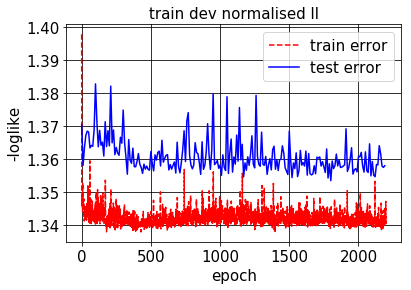

<Figure size 600x400 with 0 Axes>

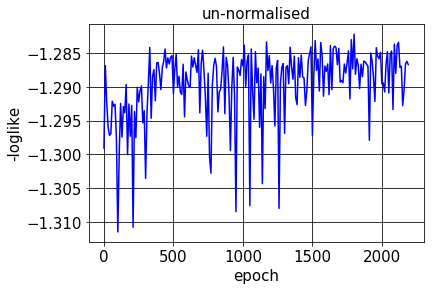

<Figure size 600x400 with 0 Axes>

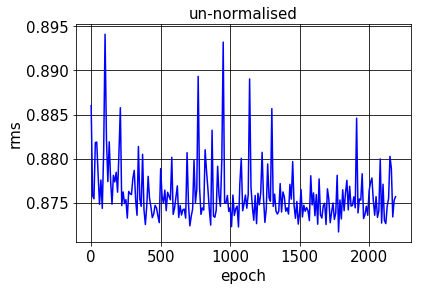

In [14]:
%matplotlib inline
from __future__ import division
import torch
from torchvision import datasets, transforms
from BNN.models import MLP_gauss
from BNN.wrapper import BNN_gauss
from BNN.train import train_BNN_regression
from src.utils import Datafeed
from src.UCI_loader import load_UCI
import numpy as np
import torch


dname = 'lsat'

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')

trainset = Datafeed(x_train, y_train, transform=None)
valset = Datafeed(x_test, y_test, transform=None)

y_means = torch.Tensor(y_means)
y_stds = torch.Tensor(y_stds)

input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)]
output_dim = y_train.shape[1]
model = MLP_gauss(input_dim, width, depth, output_dim, flatten_image=False)

N_train = x_train.shape[0]
batch_size = 512#
nb_epochs = 2200 # We can do less iterations as this method has faster convergence
log_interval = 1

lr = 1e-2

## weight saving parameters #######
burn_in = 120 # this is in epochs 
sim_steps = 20 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 100

resample_its = 10
resample_prior_its = 50 # 45 can be choosen to better control overfitting 
re_burn = 1e7


cuda = torch.cuda.is_available()
net = BNN_gauss(model, N_train, lr=lr, cuda=cuda)

save_dir = '../saves/fc_BNN_NEW_' + dname

cost_train, cost_dev, rms_dev, ll_dev = train_BNN_regression(net, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                                 burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                                 re_burn, flat_ims=False, nb_its_dev=10, y_mu=y_means, y_std=y_stds)

